### Install libraries

In [ ]:
!apt-get install libmagickwand-dev

In [2]:
from IPython.display import clear_output

!pip install ipython-autotime
!pip install camelot-py[cv] tabula-py
!apt-get update
!apt install ghostscript python3-tk
# !pip install sentence-transformers
!pip install pdfplumber

clear_output()  

### <hr>

### Import libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from tabula import read_pdf
import pandas as pd
import tqdm
from tabulate import tabulate
import pdfplumber
import glob
import camelot
import os
import re
from functools import reduce
%load_ext autotime

time: 345 µs (started: 2022-12-07 04:29:48 +00:00)


In [2]:
sheet_id = "1ixtNKdaaFW8XNROXMWWveuCxHPErju5UUgwDw5PjM_w"
sheet_name = "Files_and_Type"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
all_subpaths = list(df['Full Path'])

all_paths = []
for path in all_subpaths:
  t = glob.glob(f'/content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/**/{path}', recursive=True)
  all_paths += t

time: 5.73 s (started: 2022-12-07 04:29:48 +00:00)


### Utils

In [3]:
def get_trigrams(string):
    """
    Take a string and return a list of bigrams.
    """
    s = string.strip().lower()
    return [s[i:i+3] for i in list(range(len(s) - 2))]

def string_similarity(str1, str2):
    """
    Perform bigram comparison between two strings
    and return a percentage match in decimal form.
    """
    str1 = re.sub('[^A-Za-z0-9]+', '', str1)
    str2 = re.sub('[^A-Za-z0-9]+', '', str2)
    pairs1 = get_trigrams(str1)
    pairs2 = get_trigrams(str2)
    union  = len(pairs1) + len(pairs2)
    hit_count = 0
    for x in pairs1:
        for y in pairs2:
            if x == y:
                hit_count += 1
                break
    return (2.0 * hit_count) / union if union != 0 else 0

time: 2.8 ms (started: 2022-12-04 02:01:11 +00:00)


In [4]:
# def get_key_value(tables, keys, threshold=0.8):
#   max_score = 0
#   result = None

#   for table in tables:
#     for i in range(len(table)):
#       temp = np.array(list(table.iloc[i]))
#       temp = temp[temp != '']
#       if len(temp) != 2:
#         continue
#       scores = list(map(lambda x: string_similarity(temp[0], x), keys))
#       if max(scores) > max_score:
#         max_score = max(scores)
#         result = temp[1]

#   if max_score > threshold:
#     return result, max_score
#   print(f'max score: {max_score}')
#   return None, None

time: 612 µs (started: 2022-12-04 02:01:11 +00:00)


In [5]:
def get_key_value(tables, keys, threshold=0.8):
  max_score = 0
  result = None
  t = ''

  for table in tables:
    for i in range(len(table)):
      temp = np.array(list(table.iloc[i]))
      temp = list(temp[temp != ''])
      for j in range(len(temp)):
        scores = list(map(lambda x: string_similarity(temp[j], x), keys))
        if max(scores) > max_score and j < len(temp)-1:
          max_score = max(scores)
          result = temp[j+1]
          t = temp[j]
          # print(f'{temp[j]}, {max_score}')

  if max_score > threshold:
    return result, max_score
  # print(f'max score: {t}, {max_score}')
  return None, None

time: 3.3 ms (started: 2022-12-04 02:01:11 +00:00)


In [6]:
# def get_key_value(tables, keys, threshold=0.8):
#   max_score = 0
#   result = []
#   t = ''

#   for table in tables:
#     for i in range(len(table)):
#       temp = np.array(list(table.iloc[i]))
#       temp = list(temp[temp != ''])
#       for j in range(len(temp)):
#         scores = list(map(lambda x: string_similarity(temp[j], x), keys))
#         if max(scores) > threshold and j < len(temp)-1:
#           max_score = max(scores)
#           result = temp[j+1]
#           t = temp[j]

#   if max_score > threshold:
#     return result, max_score
#   print(f'max score: {t}, {max_score}')
#   return None, None

time: 626 µs (started: 2022-12-04 02:01:11 +00:00)


In [7]:
def is_empty_table(table):
  return (table.values == '').all()

time: 574 µs (started: 2022-12-04 02:01:11 +00:00)


### <hr>

In [8]:
# !ls '/content/drive/MyDrive/Colab Notebooks/audit_report_extraction/'

time: 302 µs (started: 2022-12-04 02:01:11 +00:00)


In [9]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/audit_report_extraction/all_tables_pdfplumber.obj', 'rb') as f:
  all_datas = pickle.load(f)

for _id, tables in enumerate(all_datas):
  if tables is None: continue
  all_datas[_id] = list(map(lambda table: table.fillna(''), tables))
  # print(f'Len after: {len(all_datas[_id])}')
# list(filter(lambda x: not all_datas[x], range(len(all_datas))))

# for _id, tables in enumerate(all_datas):
#   if tables is None: continue
#   print(f'============ {_id}')
#   print(f'Len before: {len(tables)}')
#   all_datas[_id] = list(filter(lambda x: not is_empty_table(x), tables))
#   print(f'Len after: {len(all_datas[_id])}')
list(filter(lambda x: not all_datas[x], range(len(all_datas))))

[30, 31, 32, 33, 34, 35]

time: 989 ms (started: 2022-12-04 02:01:11 +00:00)


In [10]:
# len(tables)

time: 481 µs (started: 2022-12-04 02:01:12 +00:00)


In [11]:
# tables = []
# with pdfplumber.open(all_paths[30]) as pdf: 
#   for page_id, page in enumerate(pdf.pages):
#     page_tables = page.find_tables()
#     # print(f'\n\n\n====================================\nPage: {page_id + 1}, total table: {len(tables)}')
#     # for table in tables:
#     #   print('\n\n')
#     #   print(pd.DataFrame(table.extract()).to_markdown(tablefmt='grid'))
#     tables += page_tables
# tables = list(map(lambda table: pd.DataFrame(table.extract()), tables))

time: 529 µs (started: 2022-12-04 02:01:12 +00:00)


In [12]:
# tables = []
# table_settings = {
#     "vertical_strategy": "text",
#     'horizontal_strategy': 'text'

# }
# pages = []
# with pdfplumber.open(all_paths[30]) as pdf: 
#   for page_id, page in enumerate(pdf.pages):
#     page_tables = page.extract_tables(table_settings=table_settings)
#     # print(f'\n\n\n====================================\nPage: {page_id + 1}, total table: {len(tables)}')
#     # for table in tables:
#     #   print('\n\n')
#     #   print(pd.DataFrame(table.extract()).to_markdown(tablefmt='grid'))
#     tables += page_tables
#     pages += [page]
# tables = list(map(lambda table: pd.DataFrame(table), tables))

time: 911 µs (started: 2022-12-04 02:01:12 +00:00)


In [13]:
# pdf = pdfplumber.open(all_paths[30])
# pdf.pages[1].to_image().reset().debug_tablefinder(table_settings={'intersection_tolerance': 5})

time: 283 µs (started: 2022-12-04 02:01:12 +00:00)


In [14]:
# pdf.pages[1].extract_table

time: 3.96 ms (started: 2022-12-04 02:01:12 +00:00)


time: 14.1 ms (started: 2022-12-04 02:01:12 +00:00)


time: 21.5 ms (started: 2022-12-04 02:01:12 +00:00)


time: 28.1 ms (started: 2022-12-04 02:01:12 +00:00)


In [15]:
# tables = list(map(lambda table: pd.DataFrame(table), tables))


time: 494 µs (started: 2022-12-04 02:01:12 +00:00)


In [16]:
# tables[1]

time: 507 µs (started: 2022-12-04 02:01:12 +00:00)


### Extract Company name

In [ ]:
# company_name_keys = ['Company name', 'Registered legal name', 'Organisation']
# def get_company_names(tables, threshold=0.8):
#   max_score = 0
#   company = None
  

#   for table in tables:
#     for i in range(len(table)):
#       temp = np.array(list(table.iloc[i]))
#       temp = temp[temp != '']
#       if len(temp) != 2:
#         continue
#       scores = list(map(lambda x: string_similarity(temp[0], x), company_name_keys))
#       if max(scores) > max_score:
#         max_score = max(scores)
#         company = temp[1]

#   if max_score > threshold:
#     return company, max_score
#     # print(f'Company name: {company}')
#     # print(max_score)
#   # else:
#   #   print("Couldn't find the company")
#   return None, None

time: 850 µs (started: 2022-11-22 10:25:30 +00:00)


In [ ]:
# c = 0
# total_files = 0
# for i in range(len(all_datas)):
#   tables = all_datas[i]
#   if not tables: continue
#   print(f'\n\n============================ {i+2}')
#   company, score = get_company_names(tables, threshold=-1)
#   if score > 0.8:
#     print(f'Company name: {company}, {score}')
#   else:
#     print(f"Couldn't find the company at {i+2}, {os.path.basename(all_paths[i])}\n---{company}\n---{score}")
#     c += 1
#   total_files += 1

# print(f'Number false: {c}/{total_files}')

time: 734 µs (started: 2022-11-22 10:25:30 +00:00)


In [ ]:
company_name_keys = ['Company name', 'Registered legal name', 'Organisation']

c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================{i+2}')
  ret, score = get_key_value(tables, company_name_keys, threshold=0.8)
  if ret:
    print(f'Company name: {ret}, {score}')
  else:
    print(f"Couldn't find the company at {i+2}, {os.path.basename(all_paths[i])}\n---{ret}\n---{score}")
    c += 1
  total_files += 1
print(f'Total false: {c}/{total_files}')

============================2
Company name: IFF - International Flavors & Fragrances, Inc. - Carrollton, 1.0
============================3
Company name: Florida Products S.A., 1.0
============================4
Company name: AEP ANADOLU ETAP PENKON GIDA VE TARIM ÜRÜNLERİ SAN. VE TİC. A.Ş., 1.0
============================5
Company name: Kerry Inc, 1.0
============================6
Company name: International Flavors and Fragrances, 1.0
============================7
Company name: Austria Juice Poland Sp. z o.o., 1.0
============================8
Couldn't find the company at 8, LR Citrofrut.pdf
---None
---None
============================9
Couldn't find the company at 9, short report.pdf
---None
---None
============================10
Couldn't find the company at 10, Fairlife_GFSI_Audit_Report_FSSC_v5_Coopersville_MI_Redacted_06_16_21.pdf
---None
---None
============================11
Couldn't find the company at 11, FSSC22000_KN_short_version.pdf
---None
---None
==========================

### <hr>

### Extract location

In [ ]:
# address_keys = ['Address', 'Location', 'Street address, city, country']

# max_score = 0
# address = None
# threshold = 0.8

# for table in tables:
#   for i in range(len(table)):
#     temp = np.array(list(table.iloc[i]))
#     temp = temp[temp != '']
#     if len(temp) != 2:
#       continue
#     scores = list(map(lambda x: string_similarity(temp[0], x), address_keys))
#     if max(scores) > max_score:
#       max_score = max(scores)
#       address = temp[1]

# if max_score > threshold:
#   print(f'Address: {address}')
#   print(max_score)
# else:
#   print("Couldn't find the address")

time: 833 µs (started: 2022-11-22 10:25:36 +00:00)


time: 11.5 ms (started: 2022-11-22 10:25:36 +00:00)


In [ ]:
all_datas[7][2]

,0,1,2
0,(cid:54)(cid:70)(cid:82)(cid:83)(cid:72)(cid:3...,(cid:54)(cid:70)(cid:82)(cid:83)(cid:72)(cid:3...,
1,,(cid:51)(cid:85)(cid:82)(cid:71)(cid:88)(cid:7...,(cid:54)(cid:76)(cid:87)(cid:72)
2,(cid:51)(cid:85)(cid:82)(cid:71)(cid:88)(cid:7...,(cid:41)(cid:54)(cid:54)(cid:38)(cid:3)(cid:21...,


time: 14.5 ms (started: 2022-11-22 10:25:36 +00:00)


time: 24.2 ms (started: 2022-11-22 10:25:36 +00:00)


time: 34.5 ms (started: 2022-11-22 10:25:36 +00:00)


In [ ]:
address_keys = ['Address', 'Location', 'Street address, city, country']
c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================ {i+2}')
  address, score = get_key_value(tables, address_keys, threshold=0.8)
  if address:
    print(f'Address: {address}, {score}')
  else:
    print(f"Couldn't find the address at {i}, {all_paths[i]}")
    c += 1
  total_files += 1
print(f'Total false: {c}/{total_files}')

============================ 2
Address: 1620 West Crosby
Carrollton, Texas 75006-6656 United States, 1.0
============================ 3
Address: 100 metros al Norte de la entrada principal del CENADA, Barreal, Ulloa
, Heredia  Costa Rica, 1.0
============================ 4
Address: Akçaköy Mahallesi 20600 Çivril Denizli TURKEY, 1.0
============================ 5
Address: 158 State Highway 320 
Norwich, New York 
13815-3561 USA, 1.0
============================ 6
Address: 150 Docks Corner Rd, Dayton, NJ 08810, 1.0
============================ 7
Address: 27-540 Lipnik, Gołębiów 29, 1.0
============================ 8
Couldn't find the address at 6, /content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/LR/LR Citrofrut.pdf
============================ 9
Couldn't find the address at 7, /content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/LR/short report.pdf
============================ 10
Address: 999 West Randall Street,Coopersville,US, 0.9230769230769231
======

### <hr>

### Number critical

In [ ]:
num_critical_keys = ['critical', 'critical non-conformities', 'Number of critical non-conformities identified during this audit', "Critical NCR’s"]
c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================ {i+2}')
  ret, score = get_key_value(tables, num_critical_keys, threshold=0.7)
  if ret:
    print(f'Number critical: {ret}, {score}')
  else:
    print(f"Couldn't find the critical information at {i}, {os.path.basename(all_paths[i])}")
    c += 1
  total_files += 1
print(f'Total false: {c}/{total_files}')

============================ 2
Number critical: 0, 1.0
============================ 3
Number critical: 0, 1.0
============================ 4
Couldn't find the critical information at 2, FSSC Aep Anadolu.pdf
============================ 5
Number critical: 0, 0.84
============================ 6
Number critical: 0, 0.84
============================ 7
Number critical: 0, 0.84
============================ 8
Couldn't find the critical information at 6, LR Citrofrut.pdf
============================ 9
Couldn't find the critical information at 7, short report.pdf
============================ 10
Couldn't find the critical information at 8, Fairlife_GFSI_Audit_Report_FSSC_v5_Coopersville_MI_Redacted_06_16_21.pdf
============================ 11
Number critical: No, 0.9130434782608695
============================ 12
Couldn't find the critical information at 10, FSSC Audit Report-2019.pdf
============================ 13
Number critical: 0, 1.0
============================ 14
Number critical: 0, 1.0


In [ ]:
string_similarity('critical non-conformities', '(no) Critical nonconformity (ies)')

0.8888888888888888

time: 4.88 ms (started: 2022-11-22 10:25:52 +00:00)


In [ ]:
# tables = all_datas[20]
# tables[]

time: 559 µs (started: 2022-11-22 10:25:52 +00:00)


time: 7.69 ms (started: 2022-11-22 10:25:52 +00:00)


### <hr>

### Number major

In [ ]:
num_major_keys = ['major', 'major non-conformities', 'Number of major non-conformities identified during this audit', "Major NCR’s"]
c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================ {i+2}')
  ret, score = get_key_value(tables, num_major_keys, threshold=0.7)
  if ret:
    print(f'Number major: {ret}, {score}')
  else:
    print(f"Couldn't find the major information at {i}, {os.path.basename(all_paths[i])}")
    c += 1
  total_files += 1
print(f'Total false: {c}/{total_files}')

============================ 2
Number major: 0, 1.0
============================ 3
Number major: 0, 1.0
============================ 4
Couldn't find the major information at 2, FSSC Aep Anadolu.pdf
============================ 5
Number major: 0, 0.8181818181818182
============================ 6
Number major: 0, 0.8181818181818182
============================ 7
Number major: 0, 0.8275862068965517
============================ 8
Couldn't find the major information at 6, LR Citrofrut.pdf
============================ 9
Couldn't find the major information at 7, short report.pdf
============================ 10
Number major: 9, 0.7441860465116279
============================ 11
Number major: No, 1.0232558139534884
============================ 12
Couldn't find the major information at 10, FSSC Audit Report-2019.pdf
============================ 13
Number major: 1, 1.0
============================ 14
Number major: 0, 1.0
============================ 15
Number major: 0, 1.0
=======================

### <hr>

### Number minor

In [ ]:
# list(map(lambda x: string_similarity('Minor nonconformities (Minor NC)', x), num_minor_keys))

time: 563 µs (started: 2022-11-22 10:26:03 +00:00)


In [ ]:
num_minor_keys = ['minor', 'minor non-conformities', 'Number of minor non-conformities identified during this audit', "Minor NCR’s"]
c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================ {i+2}')
  ret, score = get_key_value(tables, num_minor_keys, threshold=0.8)
  if ret:
    # ret = ret.split(' ')[0]
    print(f'Number minor: {ret}, {score}')
  else:
    print(f"Couldn't find the minor information at {i}, {os.path.basename(all_paths[i])}")
    c += 1
  total_files += 1
print(f'Total false: {c}/{total_files}')

============================ 2
Number minor: 11, 1.0
============================ 3
Number minor: 9, 1.0
============================ 4
Number minor: 2, 0.8205128205128205
============================ 5
Number minor: ICT, 1.0
============================ 6
Number minor: "Requirement: 5.7 -Facilities used to store ingredients, packaging 
and products shall provide protection from dust, condensation, 
drains, waste and other sources of contamination. 
Storage areas shall be dry and well ventilated. Monitoring and 
control of temperature and humidity shall be applied where 
specified. 
Storage areas shall be designed or arranged to allow segregation 
of raw materials, work in progress and finished products. 
All materials and products shall be stored off the floor and with 
sufficient space between the material and the walls to allow 
inspection and pest control activities to be carried out. 
The storage area shall be designed to allow maintenance and 
cleaning, prevent contamination and 

### <hr>

### Audit type

In [ ]:
audit_type_keys = ['Audit type']
prev_audit_type_keys = ['Previous Audit Type']
c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================{i+2}')
  ret, score = get_key_value(tables, audit_type_keys, threshold=0.8)
  if ret:
    print(f'Audit type: {ret}, {score}')
  else:
    ret, score = get_key_value(tables, prev_audit_type_keys, threshold=0.8)
    if ret:
      print(f'Previous Audit type: {ret}, {score}')
    else:
      print(f"Couldn't find the minor information at {i}, {os.path.basename(all_paths[i])}")
      c += 1
  total_files += 1
print(f'Total false: {c}/{total_files}')

============================2
Audit type: Recertification, 1.0
============================3
Audit type: Recertification, 1.0
============================4
Audit type: Stage 2 
 Surveillance 
 Recertification, 1.0
============================5
Audit type: Periodic, 1.0
============================6
Audit type: Recertification, 1.0
============================7
Audit type: PA2, 1.0
============================8
Couldn't find the minor information at 6, LR Citrofrut.pdf
============================9
Couldn't find the minor information at 7, short report.pdf
============================10
Audit type: Unannounced Surveillance 2/Focus Visit, 1.0
============================11
Couldn't find the minor information at 9, FSSC22000_KN_short_version.pdf
============================12
Couldn't find the minor information at 10, FSSC Audit Report-2019.pdf
============================13
Audit type: Recertification, 1.0
============================14
Audit type: Recertification, 1.0
==================

### <hr>

### Recommendation

In [ ]:
from camelot.handlers import PDFHandler
import math
# Helper methods for _bbox
def top_mid(bbox):
    return ((bbox[0]+bbox[2])/2, bbox[3])

def bottom_mid(bbox):
    return ((bbox[0]+bbox[2])/2, bbox[1])

def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def get_closest_text(table, htext_objs):
    min_distance = 999  # Cause 9's are big :)
    best_guess = None
    table_mid = top_mid(table._bbox)  # Middle of the TOP of the table
    for obj in htext_objs:
        text_mid = bottom_mid(obj.bbox)  # Middle of the BOTTOM of the text
        d = distance(text_mid, table_mid)
        if d < min_distance:
            best_guess = obj.get_text().strip()
            min_distance = d
    return best_guess

def get_tables_and_titles(pdf_filename):
    """Here's my hacky code for grabbing tables and guessing at their titles"""
    my_handler = PDFHandler(pdf_filename)  # from camelot.handlers import PDFHandler
    tables = camelot.read_pdf(pdf_filename, flag_size=True, pages='1-11', split_text=True, flavor='lattice', line_scale=40)
    tables = list(filter(lambda x: x.shape[1] == 2, tables))
    print('Extracting {:d} tables...'.format(len(tables)))
    titles = []
    with camelot.utils.TemporaryDirectory() as tempdir:
        for table in tables:
            # table_bbox = list(table._image[1].items())[_table_id]
            table_bbox = sorted(table._image[1].values(), key=lambda x: x[0][1])
            # print(f'{len(table_bbox)}\t\t{table.order - 1}')
            table_bbox = list(table_bbox)[table.order - 1]
            t = np.array(sorted(table_bbox, key=lambda x: x[1]))
            if len(np.where(t[:, 1] == t[0,1])[0]) > 2:
                my_handler._save_page(pdf_filename, table.page, tempdir)
                tmp_file_path = os.path.join(tempdir, f'page-{table.page}.pdf')
                layout, dim = camelot.utils.get_page_layout(tmp_file_path)
                htext_objs = camelot.utils.get_text_objects(layout, ltype="horizontal_text")
                titles.append(get_closest_text(table, htext_objs))  # Might be None
            else:
              titles += [table.data[0][0]]

    return titles, tables

time: 8.87 ms (started: 2022-11-22 10:26:16 +00:00)


In [ ]:
def get_key_value(tables, keys, threshold=0.8):
  max_score = 0
  result = None
  t = ''

  for table in tables:
    for i in range(len(table)):
      temp = np.array(list(table.iloc[i]))
      temp = list(temp[temp != ''])
      for j in range(len(temp)):
        scores = list(map(lambda x: string_similarity(temp[j], x), keys))
        if max(scores) > max_score and j < len(temp)-1:
          max_score = max(scores)
          result = temp[j+1]
          t = temp[j]

  if max_score > threshold:
    return result, max_score
  print(f'max score: {t}, {max_score}')
  return None, None

time: 3.47 ms (started: 2022-11-22 10:26:16 +00:00)


In [ ]:
rcm_keys = ['Audit Score/ Recommendation', 'Recommendation from this audit', 'Audit recommendation']
# rcm_keys = ['Audit Score/ Recommendation', 'Audit recommendation']
rcm_one_row_keys = ['Based on the result of this audit the audit team recommends that certification be']

num_success = 0
num_total = 0

get_result_tables = []
for _id, tables in enumerate(all_datas):
  print(f'\n\n========================== {_id+2}')

  threshold = 0.8
  rcm_table = []
  if not tables: continue

  for i in range(len(tables)):
    table = tables[i]
    for _row in range(len(table)):
      temp = np.array(list(table.iloc[_row]))
      temp = list(temp[temp != ''])
      if len(temp) == 0: continue
      
      scores = list(map(lambda x: string_similarity(temp[0], x), rcm_keys))
      if max(scores) > threshold:
        rcm_table += [tables[i], tables[i+1]]
        print(f'--{temp[0]}, {max(scores)}')

  print(f'Found total: {len(rcm_table)//2} keywords')
  if len(rcm_table) > 0:
    
    if rcm_table[0].shape[1] == rcm_table[1].shape[1]:
      rcm_table = pd.concat(rcm_table, axis=0, ignore_index=True)
    else:
      print(f'Table is not satisfied the shape requirements {rcm_table[0].shape}, {rcm_table[1].shape}')
      rcm_table = rcm_table[0]
    num_success += 1
    get_result_tables += [_id + 2]
  num_total += 1
  print(rcm_table)


print(f'Accuracy: {num_success} / {num_total}')



========================== 2
--Audit recommendation, 1.0
Found total: 1 keywords
                        0               1
0    Audit recommendation                
1   Initial certification  Not Applicable
2  Continue certification  Not Applicable
3        Re-certification             Yes


========================== 3
--Audit recommendation, 1.0
Found total: 1 keywords
Table is not satisfied the shape requirements (4, 2), (8, 4)
                        0               1
0    Audit recommendation                
1   Initial certification  Not Applicable
2  Continue certification  Not Applicable
3        Re-certification             Yes


========================== 4
--16. AUDIT RECOMMENDATION, 0.9444444444444444
Found total: 1 keywords
Table is not satisfied the shape requirements (4, 12), (4, 9)
                       0                         1  2  3    4  5  6   7  8   \
0                          16. AUDIT RECOMMENDATION                           
1   INITIAL CERTIFICATION      

In [ ]:
print(all_datas[28][0].to_markdown(tablefmt='grid'))

+----+-----+---------------------------------------------------------------------------------------------+
|    | 0   | 1                                                                                           |
+====+=====+=============================================================================================+
|  0 |     | Audit recommendation                                                                        |
+----+-----+---------------------------------------------------------------------------------------------+
|  1 |     | In reference to FSSC 22000 the audit team recommends to DQS CFS GmbH:                       |
|    |     |                                                                                             |
|    |     | ☐ Issuance of the certificate                                                               |
|    |     |                                                                                             |
|    |     | ☐ Issuance of the certif

time: 14.1 ms (started: 2022-11-22 10:26:22 +00:00)


time: 21.1 ms (started: 2022-11-22 10:26:22 +00:00)


###<hr>

### Audit company name

In [ ]:
audit_company_keys = ['CB Name and office location', 'CB conducting audit', 'Certification Body', 'Accreditation Body(s)']
c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================ {i+2}')
  company, score = get_key_value(tables, audit_company_keys, threshold=0.8)
  if company:
    print(f'Audit company name: {company}, {score}')
  else:
    print(f"Couldn't find the audit company at {i}, {all_paths[i]}")
    c += 1
  total_files += 1
print(f'Total false: {c}/{total_files}')

============================ 2
Audit company name: NSF International Strategic Registrations Ltd., 789 N. Dixboro Road Ann Arbor, MI 
48105, USA, 1.0
============================ 3
Audit company name: NSF International Strategic Registrations Ltd., 789 N. Dixboro Road Ann Arbor, MI 
48105, USA, 1.0
============================ 4
Audit company name: QMS cert Turkey, 1.0
============================ 5
Audit company name: DNV Business Assurance, 1.0
============================ 6
Audit company name: DNV-GL, 1.0
============================ 7
Audit company name: DNVGL, 1.0
============================ 8
max score: Acreditación, 0.4
Couldn't find the audit company at 6, /content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/LR/LR Citrofrut.pdf
============================ 9
max score: , 0
Couldn't find the audit company at 7, /content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/LR/short report.pdf
============================ 10
Audit company name: Lloyd’s Regist

In [ ]:
tables = []
with pdfplumber.open(all_paths[27]) as pdf: 
  for page_id, page in enumerate(pdf.pages):
    page_tables = page.dedupe_chars(tolerance=3).find_tables()
    # print(f'\n\n\n====================================\nPage: {page_id + 1}, total table: {len(tables)}')
    # for table in tables:
    #   print('\n\n')
    #   print(pd.DataFrame(table.extract()).to_markdown(tablefmt='grid'))
    tables += page_tables
tables = list(map(lambda table: pd.DataFrame(table.extract()), tables))

time: 16.9 s (started: 2022-11-22 10:27:55 +00:00)


In [ ]:
all_datas[27][4]

,0,1,2,3,4,5
0,,Audit scope,,,,
1,,Food category,,,CII,
2,Scope statement,Scope statement,,,Processing (Blending and/or pasteurization) of...,
3,,,,,purees and concentrates) and fruit by-products...,
4,,,,,essences).,
5,,Exclusions (when,,NA,NA,
6,,appropriate),,,,
7,,Verification of the scope,,NA,,
8,,statement,,,,


time: 13.5 ms (started: 2022-11-22 10:28:12 +00:00)


time: 26.7 ms (started: 2022-11-22 10:28:12 +00:00)


In [ ]:
with pdfplumber.open(all_paths[27]) as pdf:
    # page_tables = pdf.pages[1].find_tables()
    page = pdf.pages[1].dedupe_chars(tolerance=1)
    page_tables = page.find_tables()
    print(pd.DataFrame(page_tables[2].extract()).fillna(np.nan).replace(np.nan, '').to_markdown(tablefmt='grid'))

+----+-----------------------------+-----------------------------+-----+-----------------------------------------------------------------+----------------------------------------------------+------------------------+-----+
|    | 0                           | 1                           | 2   | 3                                                               | 4                                                  | 5                      | 6   |
+====+=============================+=============================+=====+=================================================================+====================================================+========================+=====+
|  0 |                             | Audit details               |     |                                                                 |                                                    |                        |     |
+----+-----------------------------+-----------------------------+-----+------------------------------------

time: 373 ms (started: 2022-11-22 10:28:12 +00:00)


### <hr>

### Expiration date

In [ ]:
print(pd.DataFrame(all_datas[17][1]).to_markdown(tablefmt='grid'))

+----+-------------------------+-----+---------------------------------------------------------------------------------------+-----------------+----------------+-----+-----------------+
|    | 0                       | 1   | 2                                                                                     | 3               | 4              | 5   | 6               |
+====+=========================+=====+=======================================================================================+=================+================+=====+=================+
|  0 | Additional              |     | NA                                                                                    |                 |                |     |                 |
|    | Standard(s) (covered    |     |                                                                                       |                 |                |     |                 |
|    | in this audit), if any: |     |                                

In [ ]:
expiration_date_keys = ['Expiration Date', 'Expiry date', 'Certificate expiry date']
c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================ {i+2}')
  company, score = get_key_value(tables, expiration_date_keys, threshold=0.8)
  if company:
    print(f'Expiration date: {company}, {score}')
  else:
    print(f"Couldn't find the expiration date at {i}, {all_paths[i]}")
    c += 1
  total_files += 1
print(f'Total false: {c}/{total_files}')

============================ 2
Couldn't find the expiration date at 0, /content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/FSSC Version 5/Copy of IFF - Carrollton, TX 2020 3PA 1.pdf
============================ 3
Couldn't find the expiration date at 1, /content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/FSSC Version 5/FSSC Reassessment Florida Products.pdf
============================ 4
Couldn't find the expiration date at 2, /content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/Minority/Q-cert Safe/FSSC Aep Anadolu.pdf
============================ 5
Expiration date: 29.06.2021, 1.0
============================ 6
Expiration date: 15-October-2020, 1.0
============================ 7
Expiration date: 2022/09/26, 1.0
============================ 8
Couldn't find the expiration date at 6, /content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/LR/LR Citrofrut.pdf
============================ 9
Couldn't find the expiration date at 7, /

#### <hr>

### Audit dates

In [ ]:
from dateutil import parser
from dateparser.search import search_dates
import re
def get_audit_date_value(tables, keys, threshold=0.8):
  result = None
  t = ''
  all_dates = []
  max_score = 0

  for table in tables:
    for i in range(len(table)):
      temp = np.array(list(table.iloc[i]))
      temp = list(temp[temp != ''])
      for j in range(len(temp)):
        scores = list(map(lambda x: string_similarity(temp[j], x), keys))
        if max(scores) > threshold and j < len(temp)-1:
          max_score = max(scores)
          print(temp[j+1])

          if len(temp[j+1:]) < 3:
            try:
              # result = parser.parse(' '.join(temp[j+1:]), fuzzy=True).strftime("%m/%d/%Y")
              result = search_dates(' '.join(temp[j+1:]),)
              all_dates += [r[1] for r in result] if result else []
            except: pass
          else:
            try:
              # result = parser.parse(temp[j+1], fuzzy=True).strftime("%m/%d/%Y")

              result = search_dates(temp[j+1])
              all_dates += [r[1] for r in result] if result else []
            except: pass
          t = temp[j]



  # if max_score > threshold and len(all_dates) > 0:
    # print(t)
    # return result, max_score
    # return max(all_dates), max_score
  # print(max_score)
  return all_dates
  # print(f'max score: {t}, {max_score}')
  # return None, None

time: 6.67 ms (started: 2022-11-26 16:24:44 +00:00)


In [ ]:
parser.parse('27.11.2020, 09:30- 19:30, Çivril')

In [ ]:
import datefinder
import re

input_string = "27-JAN-2020 07:55 AM - 29-JAN-2020 04:55 PM"
# a generator will be returned by the datefinder module. I'm typecasting it to a list. Please read the note of caution provided at the bottom.
matches = list(datefinder.find_dates(input_string))

if len(matches) > 0:
    # date returned will be a datetime.datetime object. here we are only using the first match.
    date = matches[0]
    print(date)
else:
    print('No dates found')

No dates found
time: 7.78 ms (started: 2022-11-27 02:35:54 +00:00)


In [ ]:
date.strftime("%m/%d/%Y")

'11/27/2020'

time: 11.8 ms (started: 2022-11-26 16:38:23 +00:00)


In [ ]:
import re
re.sub(r'([. : -"])\s', '\2', '27.11 . 2020, 09 :30-19:30') 


'27.11 \x022020, 09 :30-19:30'

time: 6.74 ms (started: 2022-11-27 00:40:26 +00:00)


In [ ]:
re.sub(r'\s+([. : -"])', r'\1', '27.11 . 2020, 09 :30-19:30')

'27.11. 2020, 09:30-19:30'

time: 5.75 ms (started: 2022-11-26 17:04:01 +00:00)


In [ ]:
audit_date_keys = ['Audit dates, times and locations (where applicable)']
c = 0
total_files = 0

for i in range(len(all_datas)):
  tables = all_datas[i]
  if not tables: continue
  print(f'============================ {i+2}')
  ret = get_audit_date_value(tables, audit_date_keys, threshold=0.8)
  # if company:
  #   print(f'Expiration date: {company}, {score}')
  # else:
  #   print(f"Couldn't find the expiration date at {i}, {all_paths[i]}")
  #   c += 1
  # print(ret)
  total_files += 1
  if len(ret) > 0:
    print([r.strftime("%m/%d/%Y") for r in ret])
    # print(ret)
    c += 1
  
print(f'Total Succress: {c}/{total_files}')

============================ 2
27-JAN-2020 07:55 AM - 29-JAN-2020 04:55 PM
['01/27/2020', '01/29/2020']
============================ 3
01-APR-2020 07:55 AM - 03-APR-2020 06:30 PM
['04/01/2020', '04/03/2020']
============================ 4
27.11.2020, 09:30- 19:30, Çivril
['11/26/2020', '11/26/2020', '11/26/2020']
============================ 5
============================ 6
============================ 7
============================ 8
============================ 9
============================ 10
============================ 11
============================ 12
============================ 13
============================ 14
============================ 15
============================ 16
============================ 17
============================ 18
============================ 19
============================ 20
============================ 21
============================ 22
============================ 23
============================ 24
============================ 25
==================

###<hr>

### Process full pipeline

In [ ]:
tables = all_datas[0]
# for table in tables:
#   print(table.to_markdown(tablefmt='grid'))

time: 2.87 ms (started: 2022-11-22 11:31:48 +00:00)


In [ ]:
def get_key_value(tables, keys, threshold=0.8):
  max_score = 0
  result = None
  t = ''

  for table in tables:
    for i in range(len(table)):
      temp = np.array(list(table.iloc[i]))
      temp = list(temp[temp != ''])
      for j in range(len(temp)):
        scores = list(map(lambda x: string_similarity(temp[j], x), keys))
        if max(scores) > max_score and j < len(temp)-1:
          max_score = max(scores)
          result = temp[j+1]
          t = temp[j]

  if max_score > threshold:
    return result, max_score
  # print(f'max score: {t}, {max_score}')
  return None, None

time: 19 ms (started: 2022-11-22 11:29:45 +00:00)


In [ ]:
company_name, cpn_score = get_key_value(tables, company_name_keys, threshold=0.8)
address, addr_score = get_key_value(tables, address_keys, threshold=0.8)
num_critical, critical_score = get_key_value(tables, num_critical_keys, threshold=0.8)
num_major, major_score = get_key_value(tables, num_major_keys, threshold=0.8)
num_minor, minor_score = get_key_value(tables, num_minor_keys, threshold=0.8)

audit_type, audit_type_score = get_key_value(tables, audit_type_keys, threshold=0.8)
if not audit_type:
  audit_type, audit_type_score = get_key_value(tables, prev_audit_type_keys, threshold=0.8)

audit_company, audit_company_score = get_key_value(tables, audit_company_keys, threshold=0.8)


result = {
    'Company name': [company_name],
    'Address': [address],
    'Audit company name': [audit_company],
    'Audit type': [audit_type],
    'Number critical': [num_critical],
    'Number major': [num_major],
    'Number minor': [num_minor]
}

result = pd.DataFrame(index=list(result.keys()), data=list(result.values()), columns=['Result'])
print(result.to_markdown(tablefmt='grid'))

+--------------------+------------------------------------------------------------------------------------+
|                    | Result                                                                             |
+====================+====================================================================================+
| Company name       | IFF - International Flavors & Fragrances, Inc. - Carrollton                        |
+--------------------+------------------------------------------------------------------------------------+
| Address            | 1620 West Crosby                                                                   |
|                    | Carrollton, Texas 75006-6656 United States                                         |
+--------------------+------------------------------------------------------------------------------------+
| Audit company name | NSF International Strategic Registrations Ltd., 789 N. Dixboro Road Ann Arbor, MI  |
|                    | 48105

In [4]:
import glob

time: 506 µs (started: 2022-12-07 04:30:52 +00:00)


In [5]:
folder_path = '/content/drive/MyDrive/otraSorted_better/otraSorted/FSSC_Audit/'
filenames = list(sorted(glob.glob('/content/drive/MyDrive/otraSorted_better/otraSorted/FSSC_Audit/*.pdf') ))

time: 583 ms (started: 2022-12-07 04:30:52 +00:00)


In [6]:
from statistics import mode

time: 7.37 ms (started: 2022-12-07 04:30:53 +00:00)


In [7]:
def keep_visible_lines(mode_value):
    """
    If the object is a ``rect`` type, keep it only if the lines are visible.

    A visible line is the one having ``non_stroking_color`` as 0.
    """
    def process(obj):
      if obj['object_type'] == 'rect':
          v = tuple(obj['non_stroking_color']) if isinstance(obj['non_stroking_color'], Iterable) else obj['non_stroking_color']
          # print(v)
          # return v == mode_value
          return v in mode_value
      return True
    return process

def get_tables_from_file(pdf_path):
  '''
  Read all tables from pdf path
  Input 
    pdf_path: <str> path to pdf file
  Return
    List of all tables, each is a pd.DataFrame object
  '''
  tables = []
  with pdfplumber.open(pdf_path) as pdf: 
    mode_value = mode(list(map(lambda x: x['non_stroking_color'], pdf.pages[0].rects)))
    filter_fn = keep_visible_lines(mode_value)
    for page_id, page in enumerate(pdf.pages):
      page = page.filter(filter_fn)
      page_tables = page.find_tables()
      tables += page_tables
    tables = list(map(lambda table: pd.DataFrame(table.extract()).fillna(''), tables))
  # list(map(lambda table: table.fillna(''), tables))
  return tables
      

time: 3.76 ms (started: 2022-12-07 04:30:53 +00:00)


In [ ]:
with pdfplumber.open(fpath) as pdf: 
  for page in pdf.pages:
    non_strokings = list(map(lambda x: tuple(x['non_stroking_color']) if isinstance(x['non_stroking_color'], Iterable) else x['non_stroking_color'], page.rects))
    

In [22]:
non_strokings = list(map(lambda x: tuple(x['non_stroking_color']) if isinstance(x['non_stroking_color'], Iterable) else x['non_stroking_color'], p.edges))
Counter(non_strokings)

NameError: ignored

time: 43.3 ms (started: 2022-12-04 02:01:26 +00:00)


/content/drive/MyDrive/otraSorted_better/otraSorted/FSSC_Audit/8bace8a2_358a_4baa_84e1_f70ee1ed9bc1_FSSC_22000_Audit_Report_Issued_211216_(1).pdf
4 420
Counter({(0.1294118, 0.5176471, 0.3333333): 1292, (0, 0, 0): 248, (0.3254902, 0.5058824, 0.2078431): 112, (1, 1, 1): 28})
[(0.1294118, 0.5176471, 0.3333333), (0, 0, 0)]
420


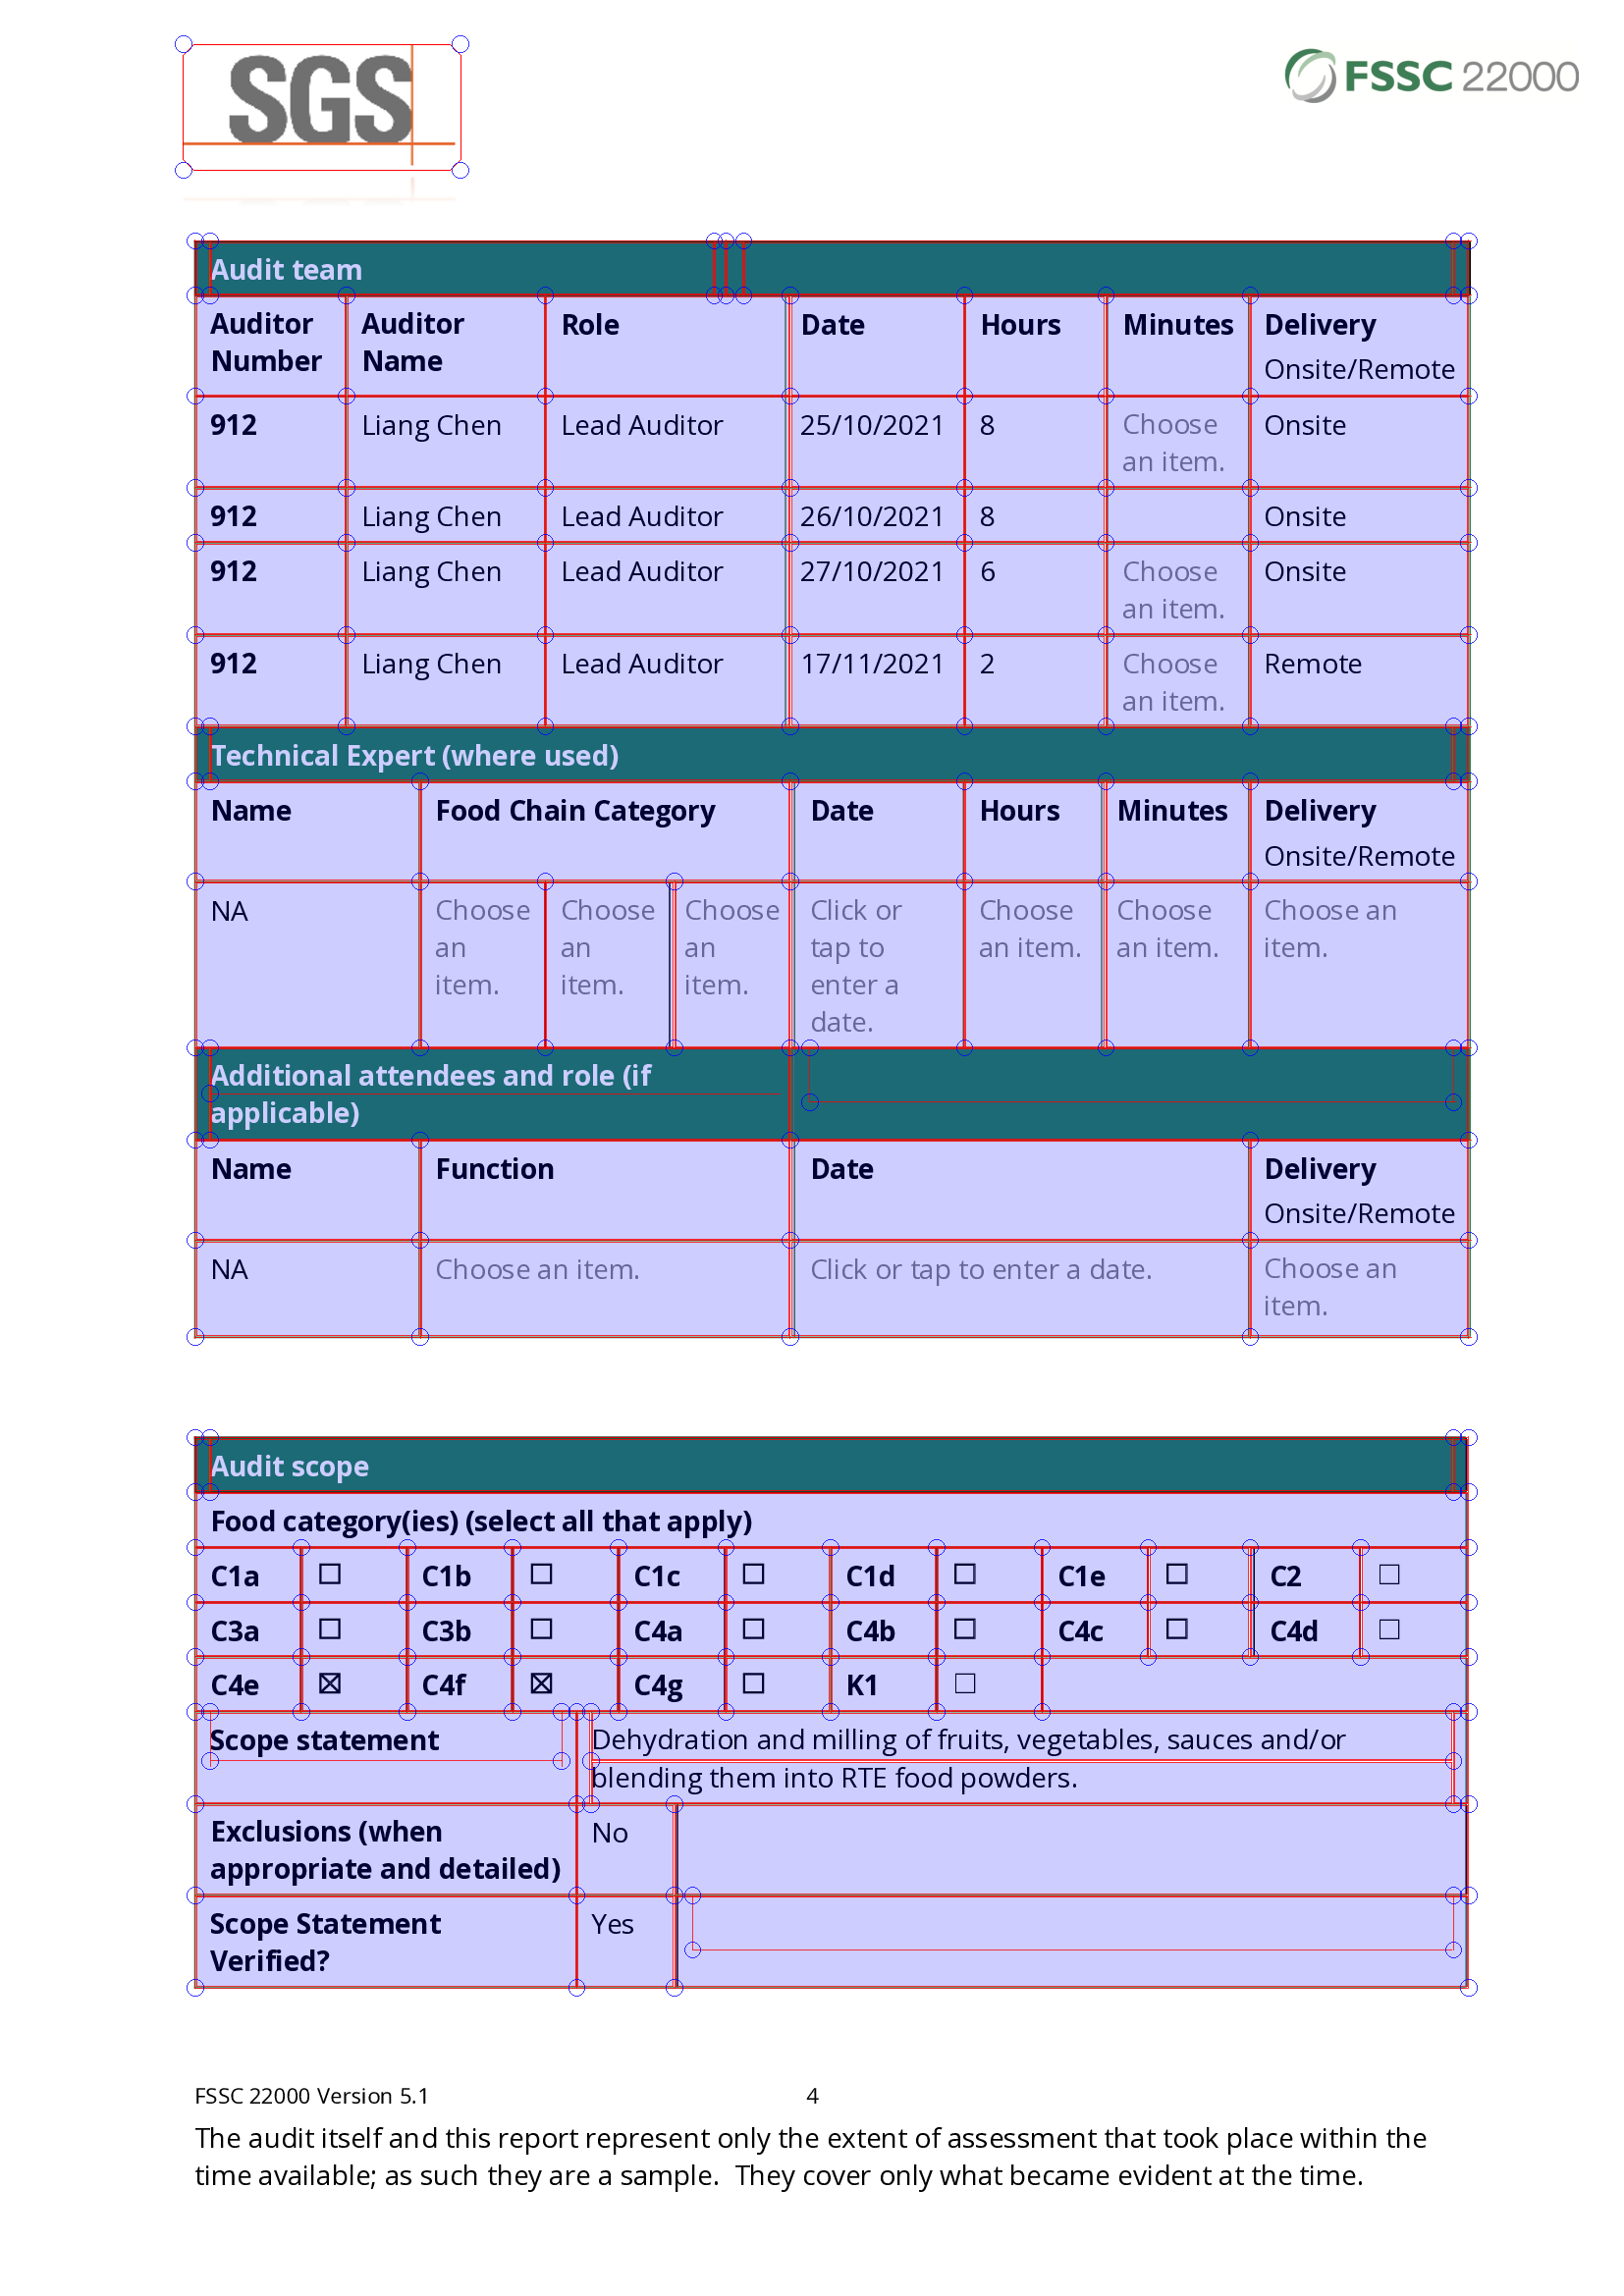

time: 6.85 s (started: 2022-12-07 04:31:11 +00:00)


In [8]:
from collections import Counter
from collections.abc import Iterable

def curves_to_edges(cs):
    edges = []
    for c in cs:
        edges += pdfplumber.utils.rect_to_edges(c)
    return edges

# table = page.find_tables({
#     "vertical_strategy": "explicit",
#     "horizontal_strategy": "explicit",
#     "explicit_vertical_lines": curves_to_edges(page.curves),
#     "explicit_horizontal_lines": curves_to_edges(page.curves),
# })[0]

# page.to_image().draw_rects(table.cells)

# fpath = folder_path + '1c4786fe-3b6b-43c6-af89-5c4f396e8973_Beef Trim N60 Addendum - 4.9.20..pdf'
fpath = filenames[15]
# fpath = all_paths[4]
print(fpath)
with pdfplumber.open(fpath) as pdf:
  p = pdf.pages[3]
  # print(list(map(lambda x: x['non_stroking_color'], p.rects)))
  # non_strokings = list(map(lambda x: tuple(x['non_stroking_color']) if type(x['non_stroking_color']) is list else x['non_stroking_color'], p.rects))
  non_strokings = list(map(lambda x: tuple(x['non_stroking_color']) if isinstance(x['non_stroking_color'], Iterable) else x['non_stroking_color'], p.edges))
  # non_strokings = list(filter(lambda x: type(x['non_stroking_color']) is not list, p.rects))
  # mode_value = mode(list(map(lambda x: x['non_stroking_color'], non_strokings)))
  # print(non_strokings)
  c = Counter(non_strokings)
  # l = list(map(lambda x: x['non_stroking_color'], non_strokings))

  if len(c) > 0 and len(p.rects) > 30:
    # mode_value = c.most_common(1)[0][0]
    n = 1
    n = 2
    temp = sorted(c.values())[::-1]
    for i in temp[1:]:
      if temp[0] / i < 2 and i > 10: n += 1
    mode_value = list(map(lambda x: x[0], c.most_common(n)))
    # mode_value = [0.502, 0]
    print(len(c), len(p.rects))
    print(c)
    # mode_value = list(mode_value) if type(mode_value) is tuple else mode_value
    print(mode_value)
    # mode_value = [0.749, 0.753]
    mode_value = list(c.values())

    filter_fn = keep_visible_lines(mode_value)

    # p = p.filter(filter_fn)
    print(len(p.rects))

  # ts = {
  #   "vertical_strategy": "lines",
  #   "horizontal_strategy": "lines",
  # }
  
  ts = {
      "vertical_strategy": "explicit",
      "horizontal_strategy": "explicit",
      "explicit_vertical_lines": curves_to_edges(p.curves + p.edges),
      "explicit_horizontal_lines": curves_to_edges(p.curves + p.edges),
  } 
  # rect_x0s = [ r["x0"] for r in p.rects ]
  # rect_x1s = [ r["x1"] for r in p.rects ]

  tables = p.find_tables(table_settings=ts)

  # for table in tables:
  #     print()
  #     for row in table:
  #         print(row)
  im = p.to_image(resolution=200)
  debugged = im.copy().debug_tablefinder(ts)
debugged

In [28]:
non_strokings = list(map(lambda x: tuple(x['non_stroking_color']) if isinstance(x['non_stroking_color'], Iterable) else x['non_stroking_color'], p.edges))
c = Counter(non_strokings)

c

Counter({0.949: 180, 1: 308, 0.753: 876, 0.749: 276})

time: 20.8 ms (started: 2022-12-04 04:17:18 +00:00)


/content/drive/MyDrive/OCR NLP Stage 2/FSSC/Documents/Audit Reports/DNV/Copy of IFF - Dayton, NJ 2020 3PA 1.pdf


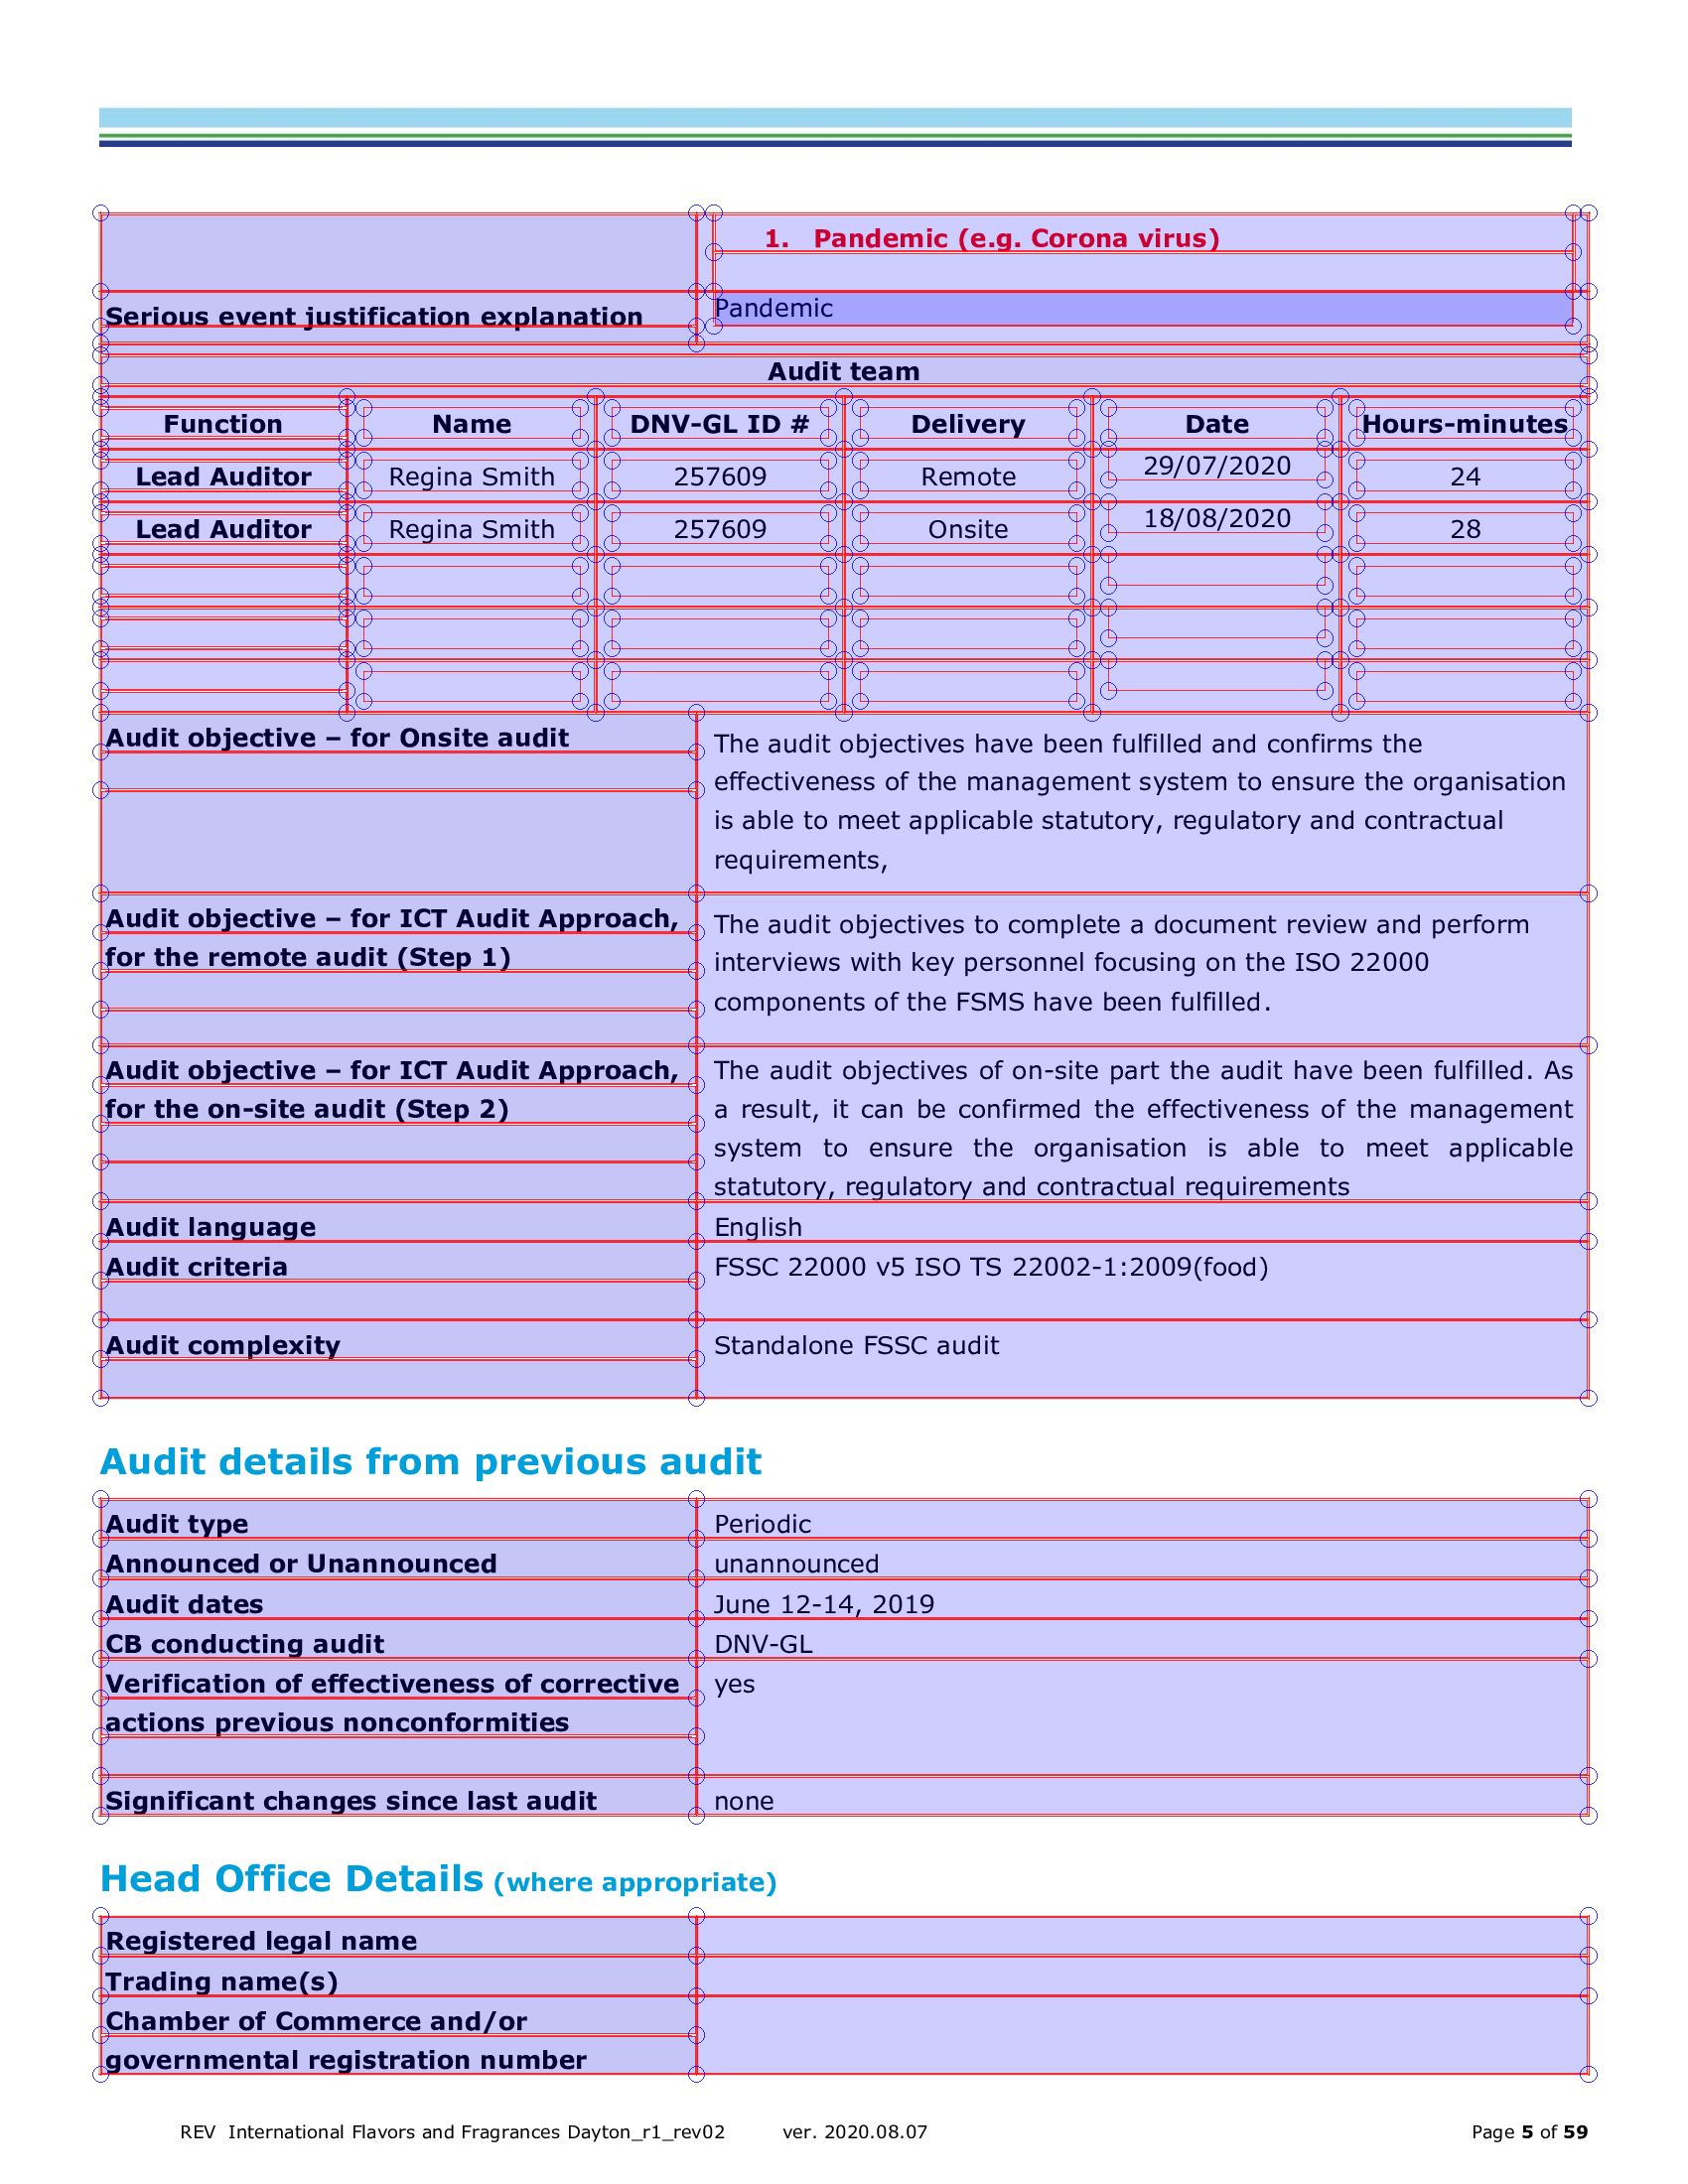

time: 4.86 s (started: 2022-12-04 04:17:09 +00:00)


In [27]:
from collections import Counter
from collections.abc import Iterable

def curves_to_edges(cs):
    edges = []
    for c in cs:
        edges += pdfplumber.utils.rect_to_edges(c)
    return edges
fpath = all_paths[4]
fpath = filenames[15]
print(fpath)
with pdfplumber.open(fpath) as pdf:
  p = pdf.pages[3]
  non_strokings = list(map(lambda x: tuple(x['non_stroking_color']) if isinstance(x['non_stroking_color'], Iterable) else x['non_stroking_color'], p.edges))
  c = Counter(non_strokings)

  if len(c) > 0 and len(p.rects) > 30:
    n = 1
    n = 2
    temp = sorted(c.values())[::-1]
    for i in temp[1:]:
      if temp[0] / i < 2 and i > 10: n += 1
    mode_value = list(map(lambda x: x[0], c.most_common(n)))
    mode_value = list(c.values())

    filter_fn = keep_visible_lines(mode_value)

    
  ts = {
      "vertical_strategy": "explicit",
      "horizontal_strategy": "explicit",
      "explicit_vertical_lines": curves_to_edges(p.edges),
      "explicit_horizontal_lines": curves_to_edges(p.edges),
  } if len(p.edges) > 0 else {
      'vertical_strategy': 'lines',
      'horizontal_strategy': 'lines'
  }

  tables = p.find_tables(table_settings=ts)
  im = p.to_image(resolution=200)
  debugged = im.copy().debug_tablefinder(ts)
debugged

In [22]:
finder = im.page.debug_tablefinder(ts)

time: 845 ms (started: 2022-12-03 15:44:26 +00:00)


In [23]:
temp_im = im.copy()

time: 14.7 ms (started: 2022-12-03 15:44:27 +00:00)


In [33]:
len(finder.edges)

60

time: 8.95 ms (started: 2022-12-03 16:09:10 +00:00)


In [35]:
img = cv2.cvtColor(np.array(temp_im.original), cv2.COLOR_RGB2BGR)

time: 83.3 ms (started: 2022-12-03 16:10:32 +00:00)


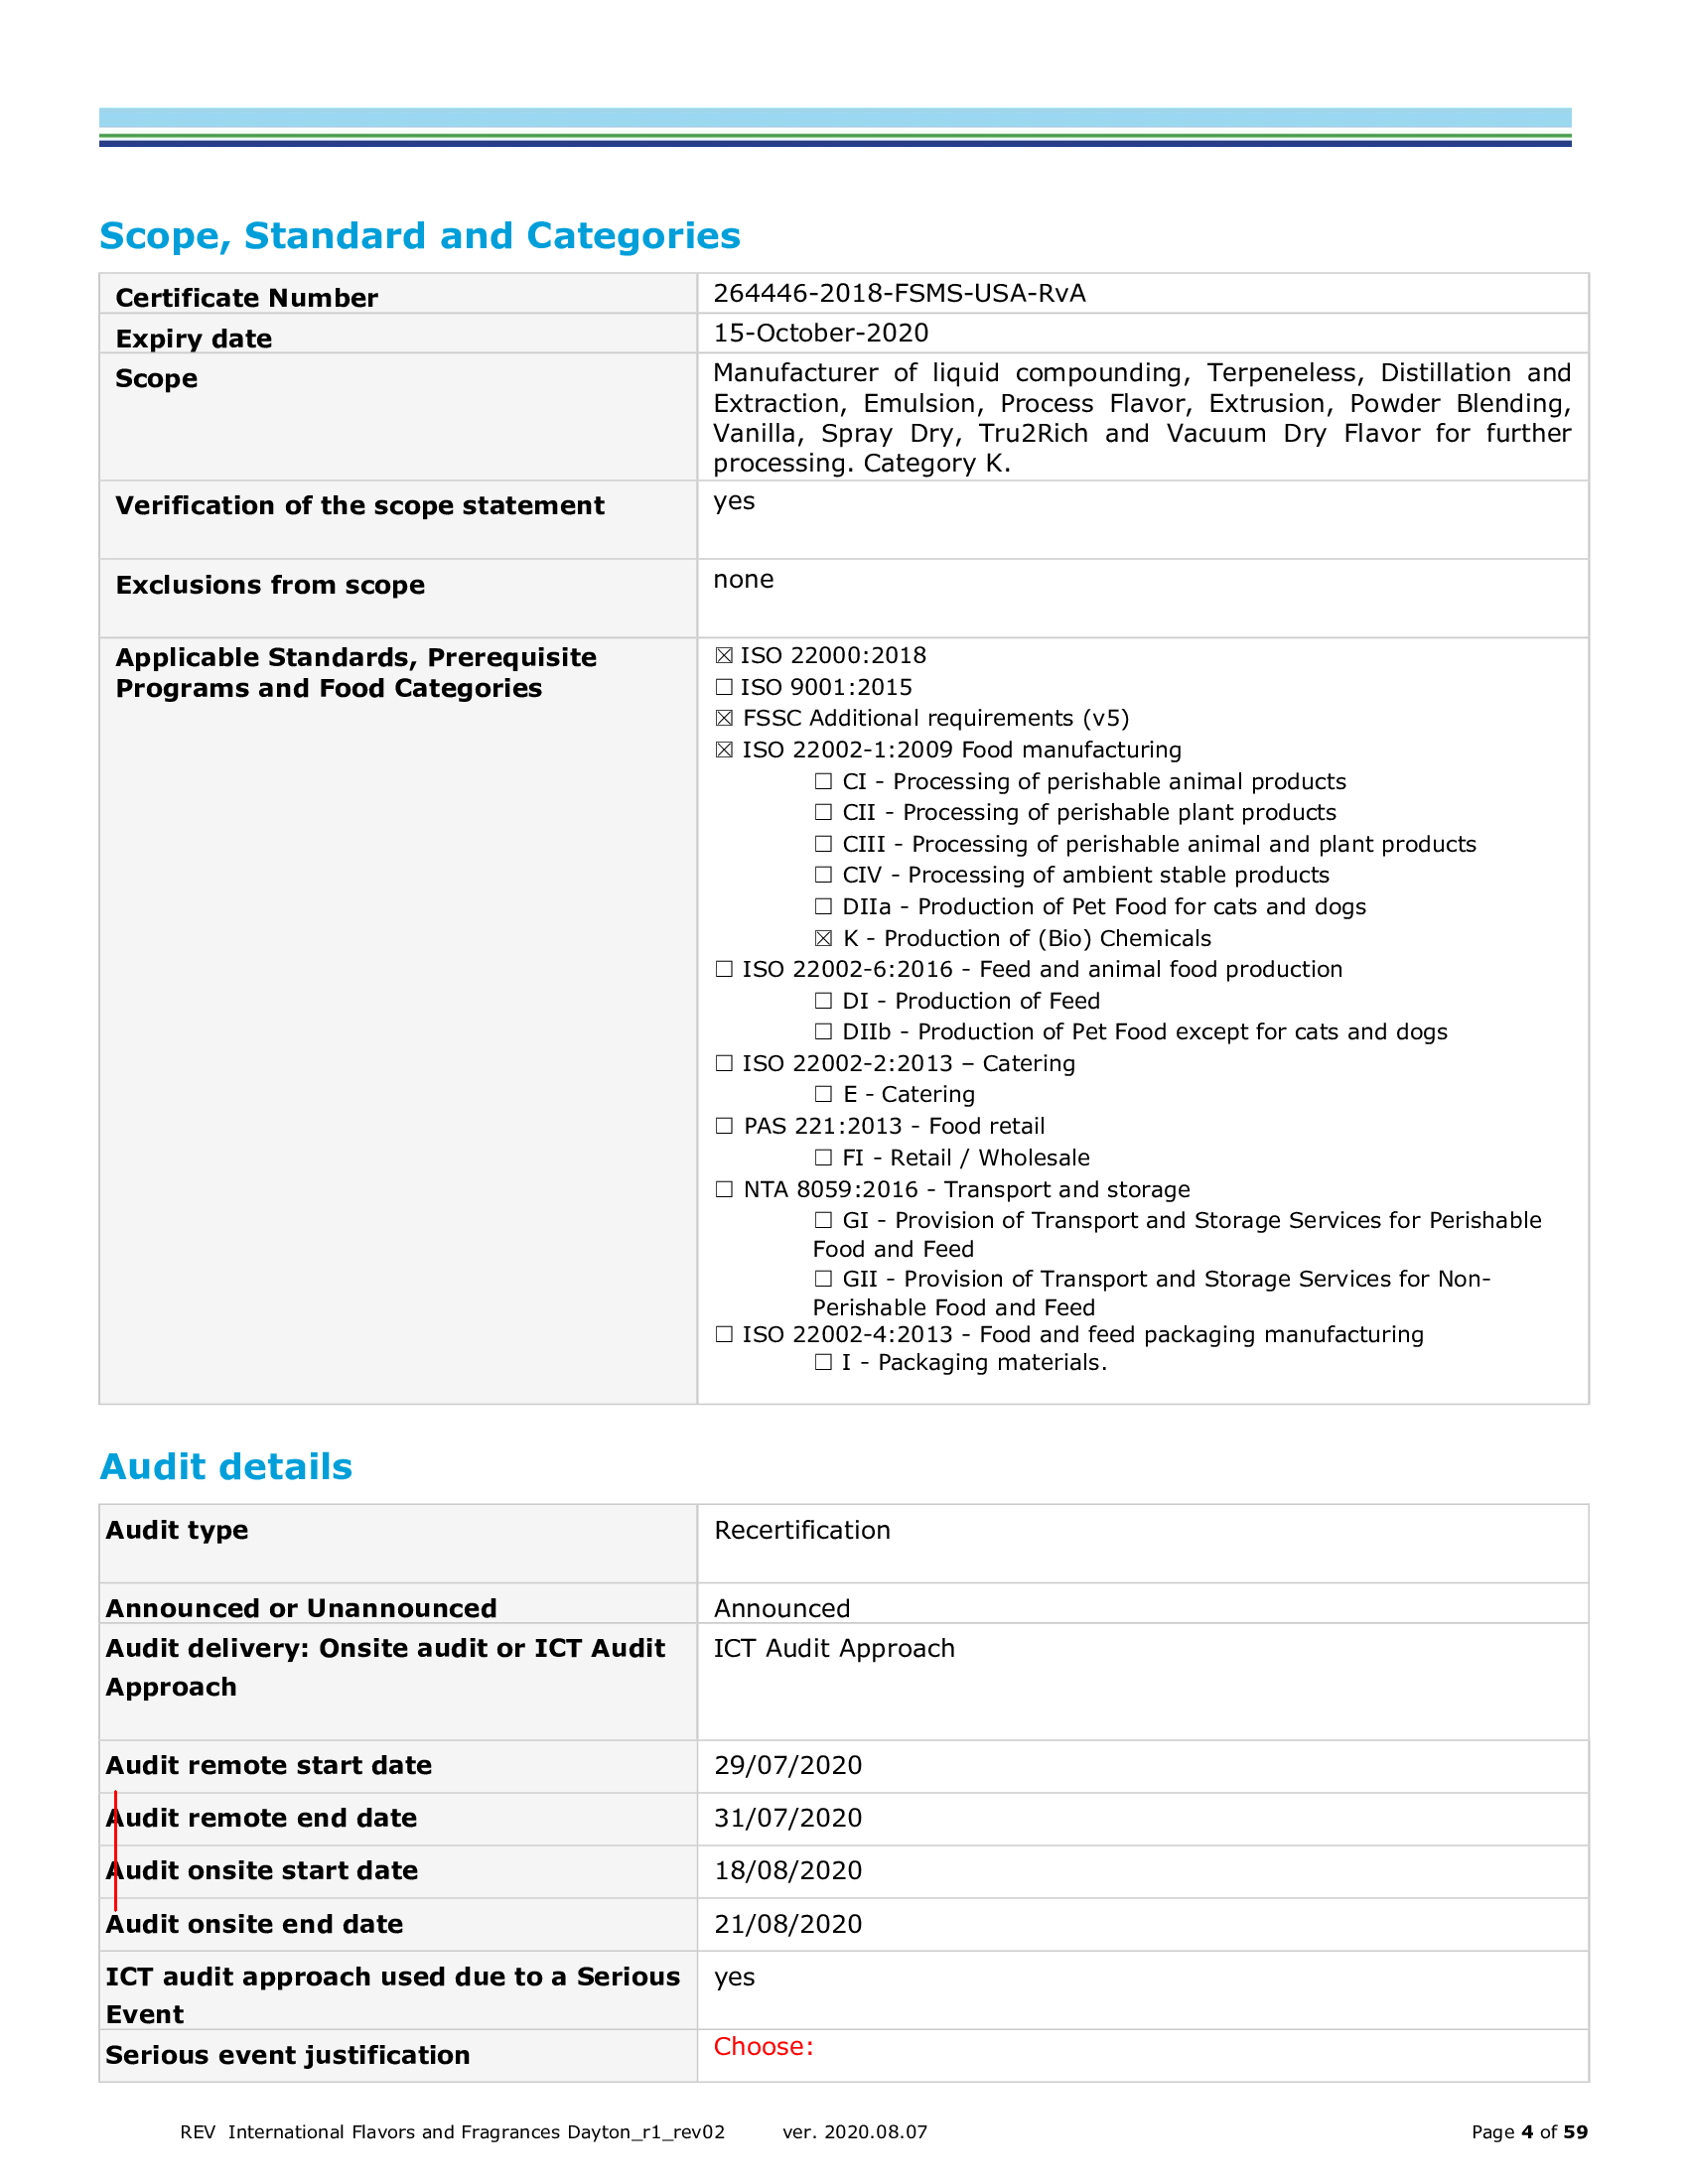

{'x0': 41.76000000000015,
 'y0': 649.78,
 'x1': 41.76000000000015,
 'y1': 692.74,
 'width': 0,
 'height': 42.960000000000036,
 'pts': [(41.76, 678.7), (247.13, 678.7), (247.13, 692.74), (41.76, 692.74)],
 'linewidth': 0,
 'stroke': False,
 'fill': True,
 'evenodd': True,
 'stroking_color': None,
 'non_stroking_color': 0.949,
 'object_type': 'rect_edge',
 'page_number': 4,
 'top': 99.25999999999999,
 'bottom': 142.22000000000003,
 'doctop': 2475.26,
 'orientation': 'v'}

time: 327 ms (started: 2022-12-03 16:17:38 +00:00)


In [48]:
viz_img = img.copy()
# for edge in finder.edges[40:42]:
#   if edge['orientation'] == 'h': continue

edge = finder.edges[40]

x0 = int(edge['x0'] * temp_im.scale)
x1 = int(edge['x1'] * temp_im.scale)
y0 = int(edge['y0'] * temp_im.scale)
y1 = int(edge['y1'] * temp_im.scale)

cv2.line(viz_img, (x0,y0), (x1,y1), (0,0,255), 2)

cv2_imshow(viz_img)

edge

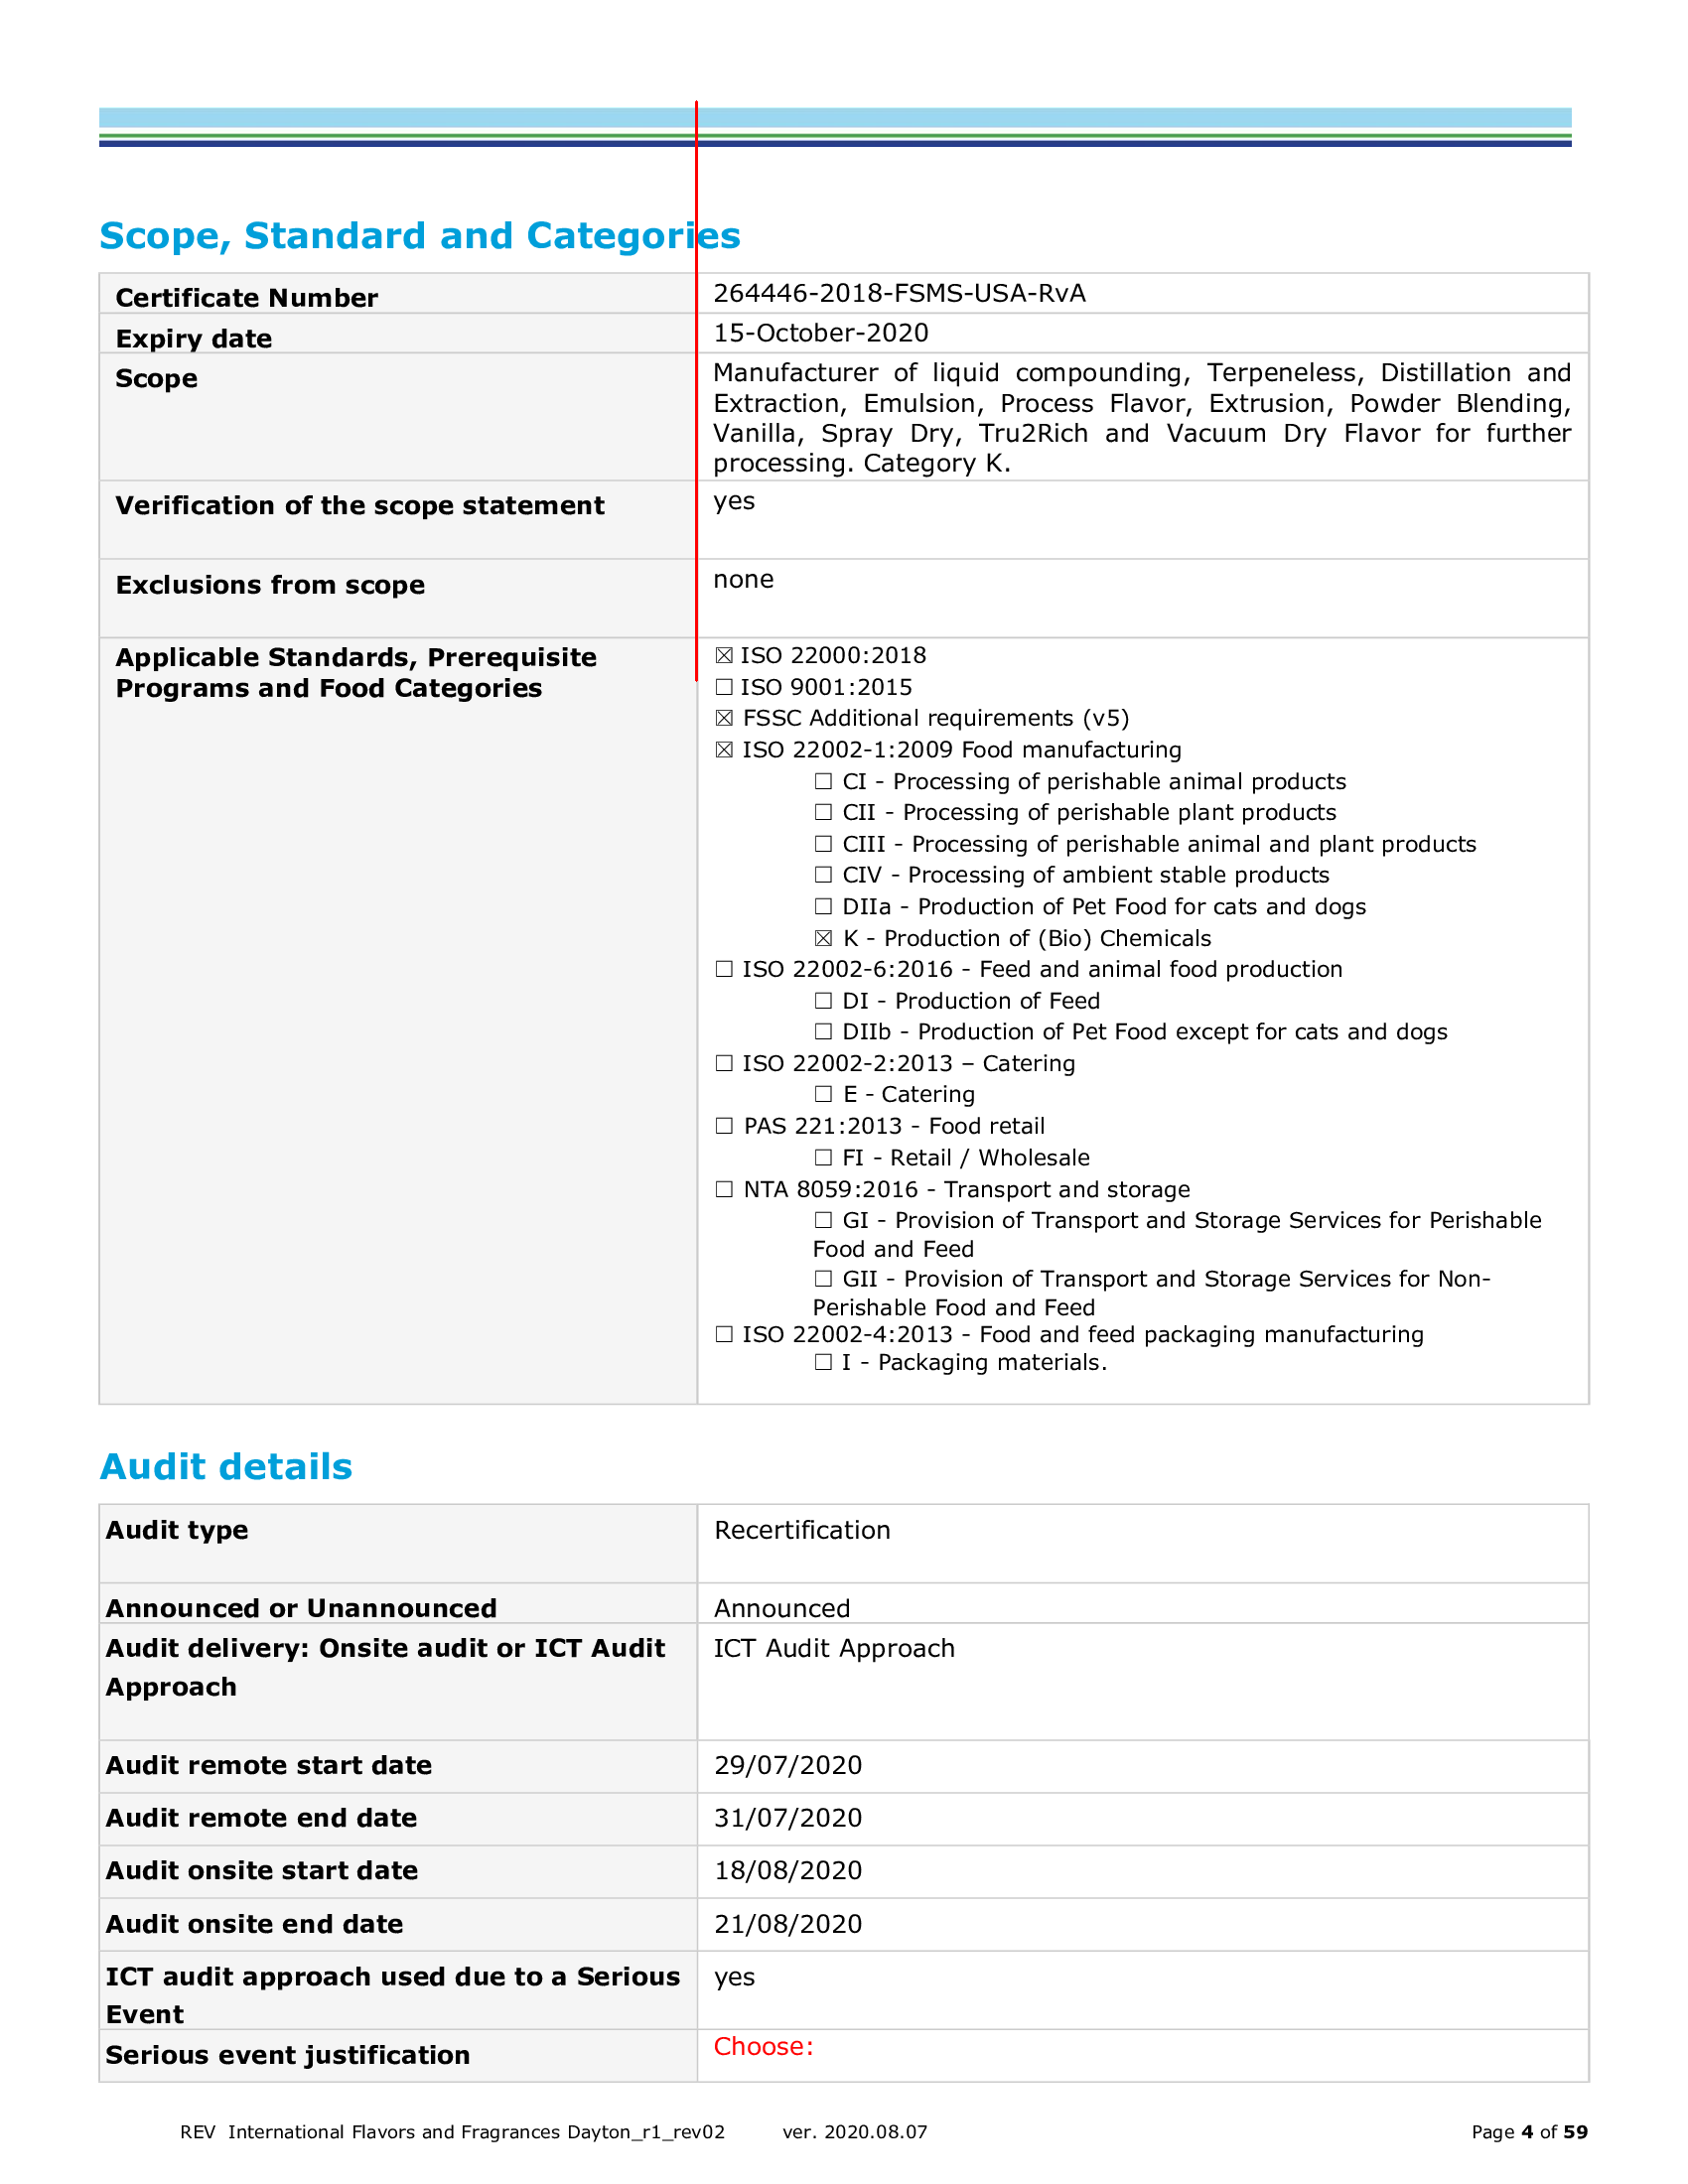

{'x0': 252.68794213235768,
 'y0': 36.744,
 'x1': 252.68794213235768,
 'y1': 246.76998,
 'width': 0,
 'height': 210.02598,
 'pts': [(35.64, 246.29),
  (252.52999999999997, 246.29),
  (252.52999999999997, 246.76998),
  (35.64, 246.76998)],
 'linewidth': 0,
 'stroke': False,
 'fill': True,
 'evenodd': True,
 'stroking_color': None,
 'non_stroking_color': 0.753,
 'object_type': 'rect_edge',
 'page_number': 4,
 'top': 545.23002,
 'bottom': 755.256,
 'doctop': 2921.23002,
 'orientation': 'v'}

time: 347 ms (started: 2022-12-03 16:18:08 +00:00)


In [51]:
viz_img = img.copy()
# for edge in finder.edges[40:42]:
#   if edge['orientation'] == 'h': continue

edge = finder.edges[45]

x0 = int(edge['x0'] * temp_im.scale)
x1 = int(edge['x1'] * temp_im.scale)
y0 = int(edge['y0'] * temp_im.scale)
y1 = int(edge['y1'] * temp_im.scale)

cv2.line(viz_img, (x0,y0), (x1,y1), (0,0,255), 2)

cv2_imshow(viz_img)

edge

In [57]:
p.cached_properties

['_rect_edges', '_edges', '_objects', '_layout']

time: 3.78 ms (started: 2022-12-03 16:46:51 +00:00)


In [ ]:
temp_im.outline_words()

In [160]:
from pdfplumber.table import edges_to_intersections, intersections_to_cells, cells_to_tables, Table

intersections = edges_to_intersections(finder.edges, x_tolerance=3, y_tolerance=3)

time: 2 ms (started: 2022-12-03 06:34:42 +00:00)


In [170]:
len(intersections.keys())

65

time: 3.68 ms (started: 2022-12-03 06:48:07 +00:00)


In [169]:
intersections = {k:v for k, v in intersections.items() if v['h'][0]['non_stroking_color'] == v['v'][0]['non_stroking_color']}

time: 1.12 ms (started: 2022-12-03 06:48:04 +00:00)


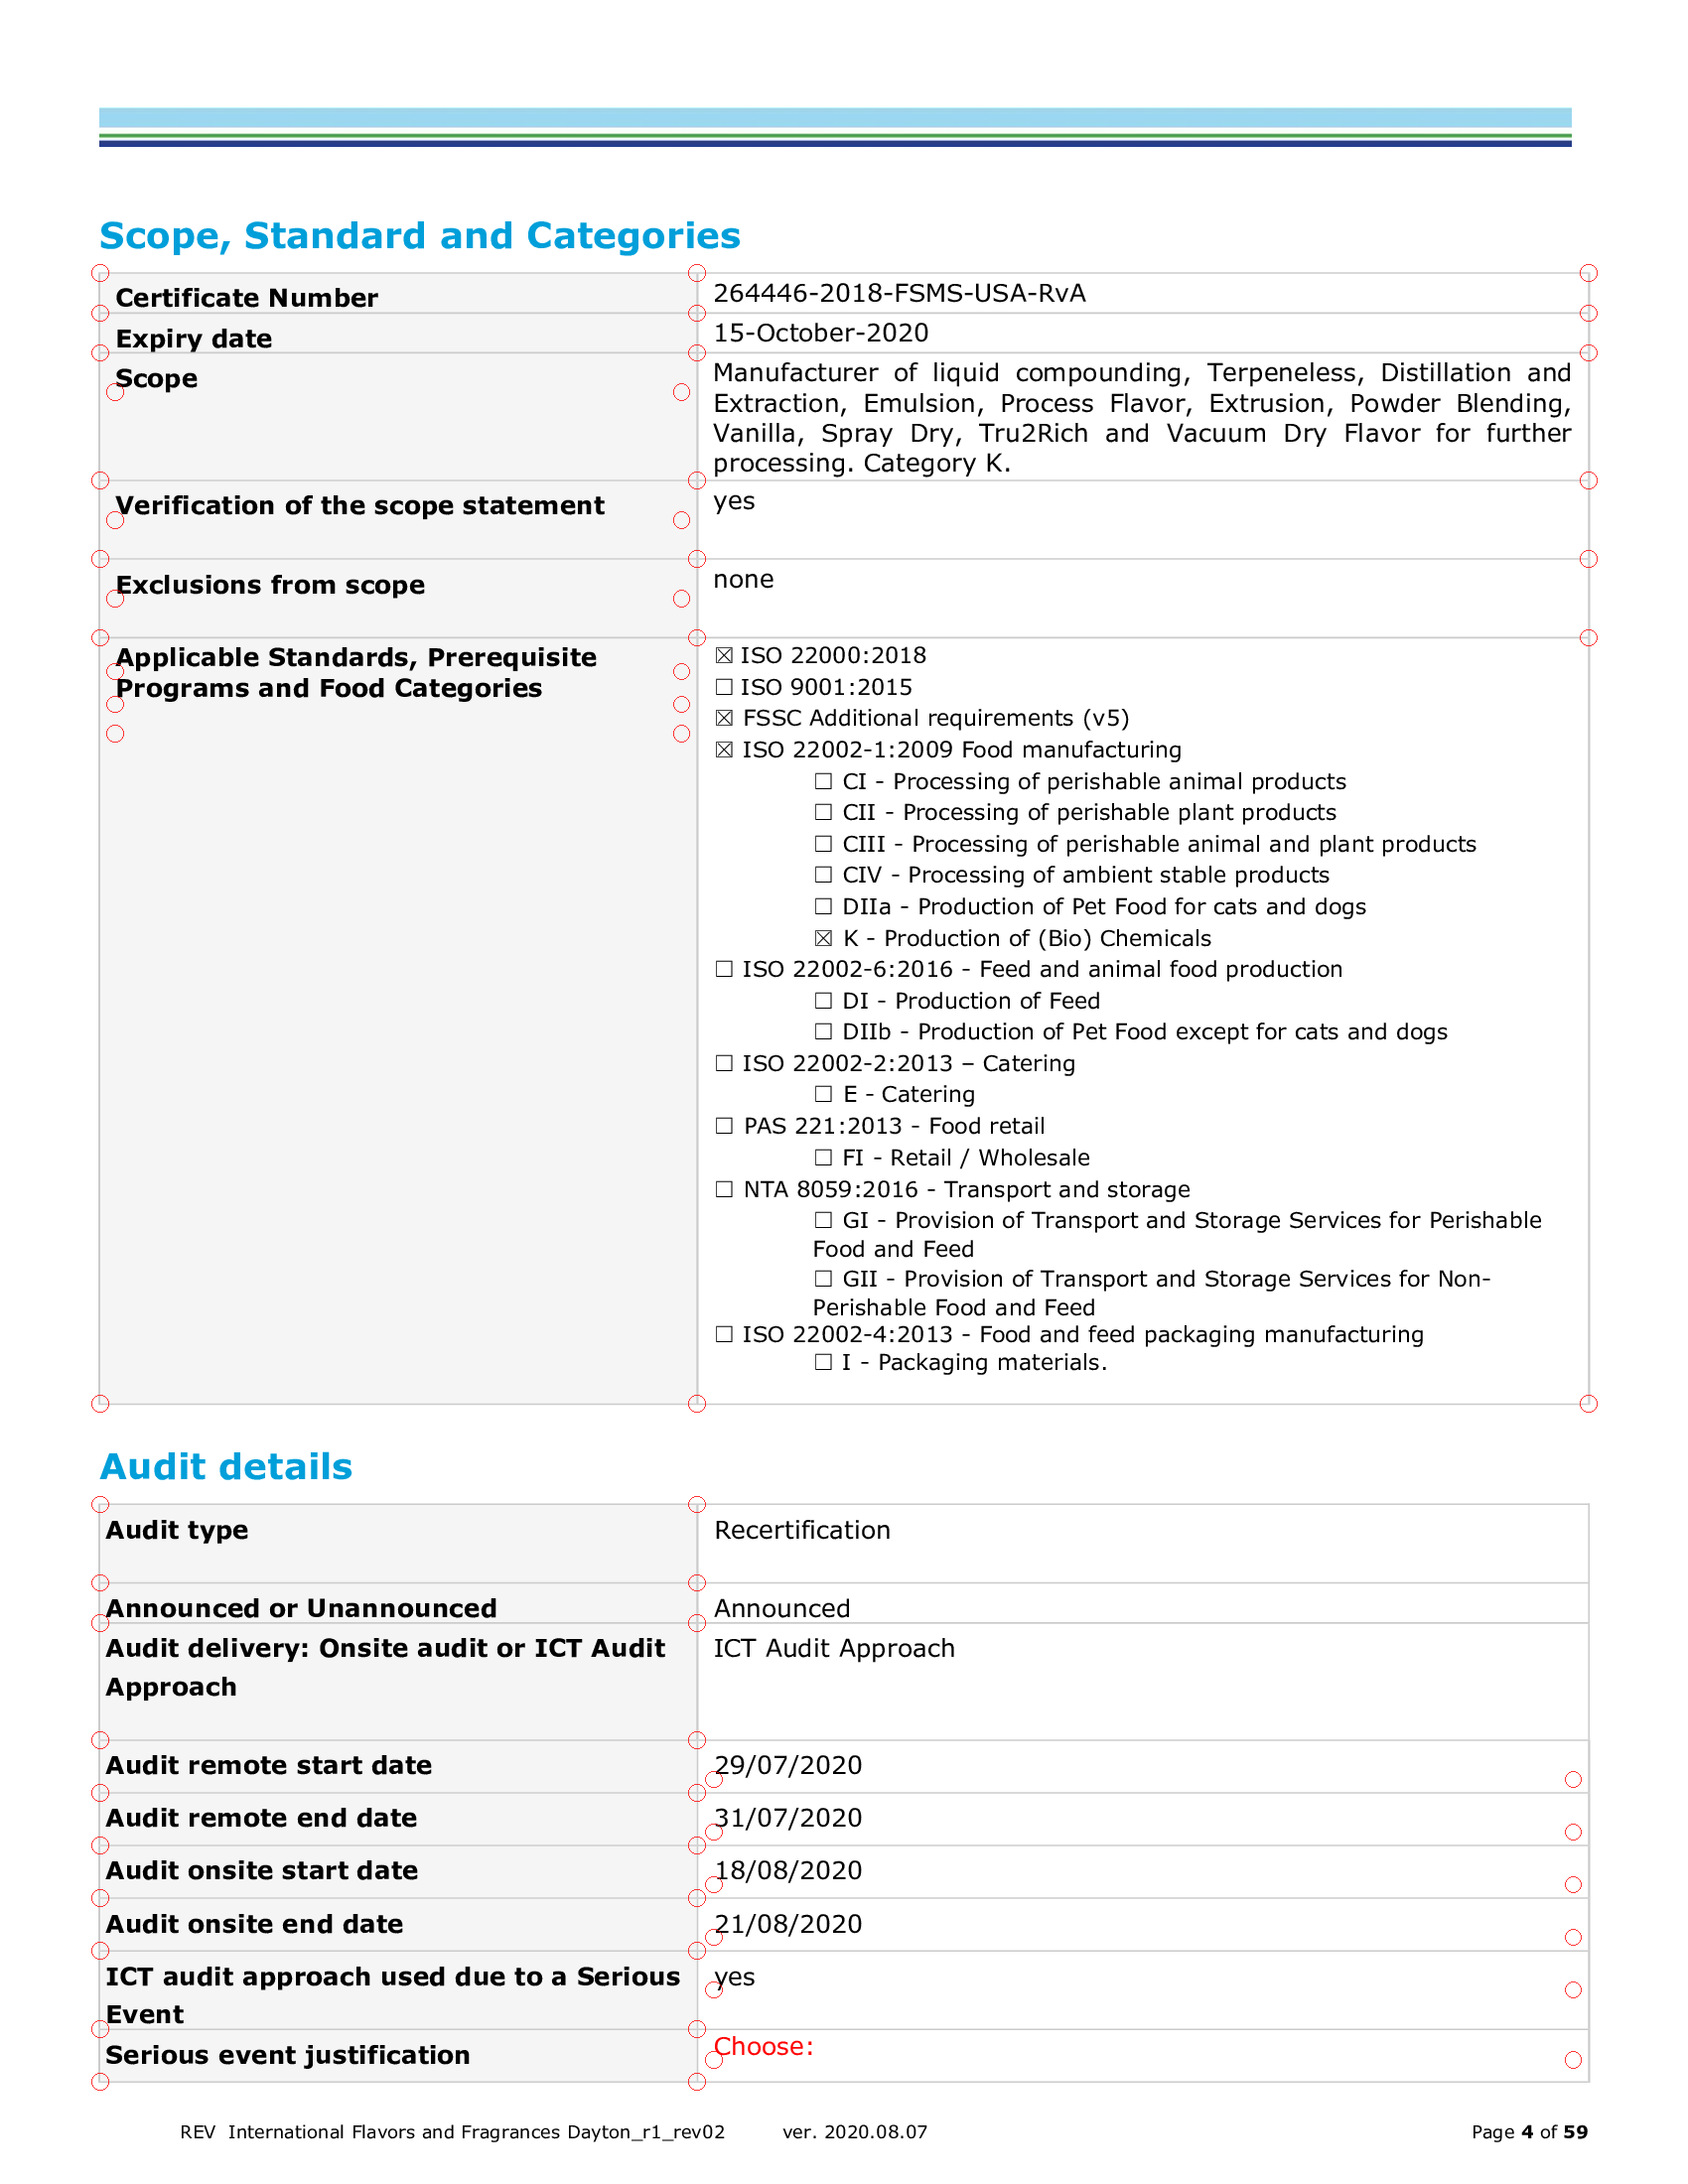

time: 255 ms (started: 2022-12-03 06:48:18 +00:00)


In [171]:
temp_im.copy().draw_circles(intersections.keys(), radius=3, fill=(0,0,0,0))
# temp_im

In [152]:
origin_cells = intersections_to_cells(intersections)
cells = np.array(intersections_to_cells(intersections)) * temp_im.scale

time: 17.1 ms (started: 2022-12-03 05:52:31 +00:00)


In [122]:
img = cv2.cvtColor(np.array(temp_im.original), cv2.COLOR_RGB2BGR)

time: 16.7 ms (started: 2022-12-03 04:37:34 +00:00)


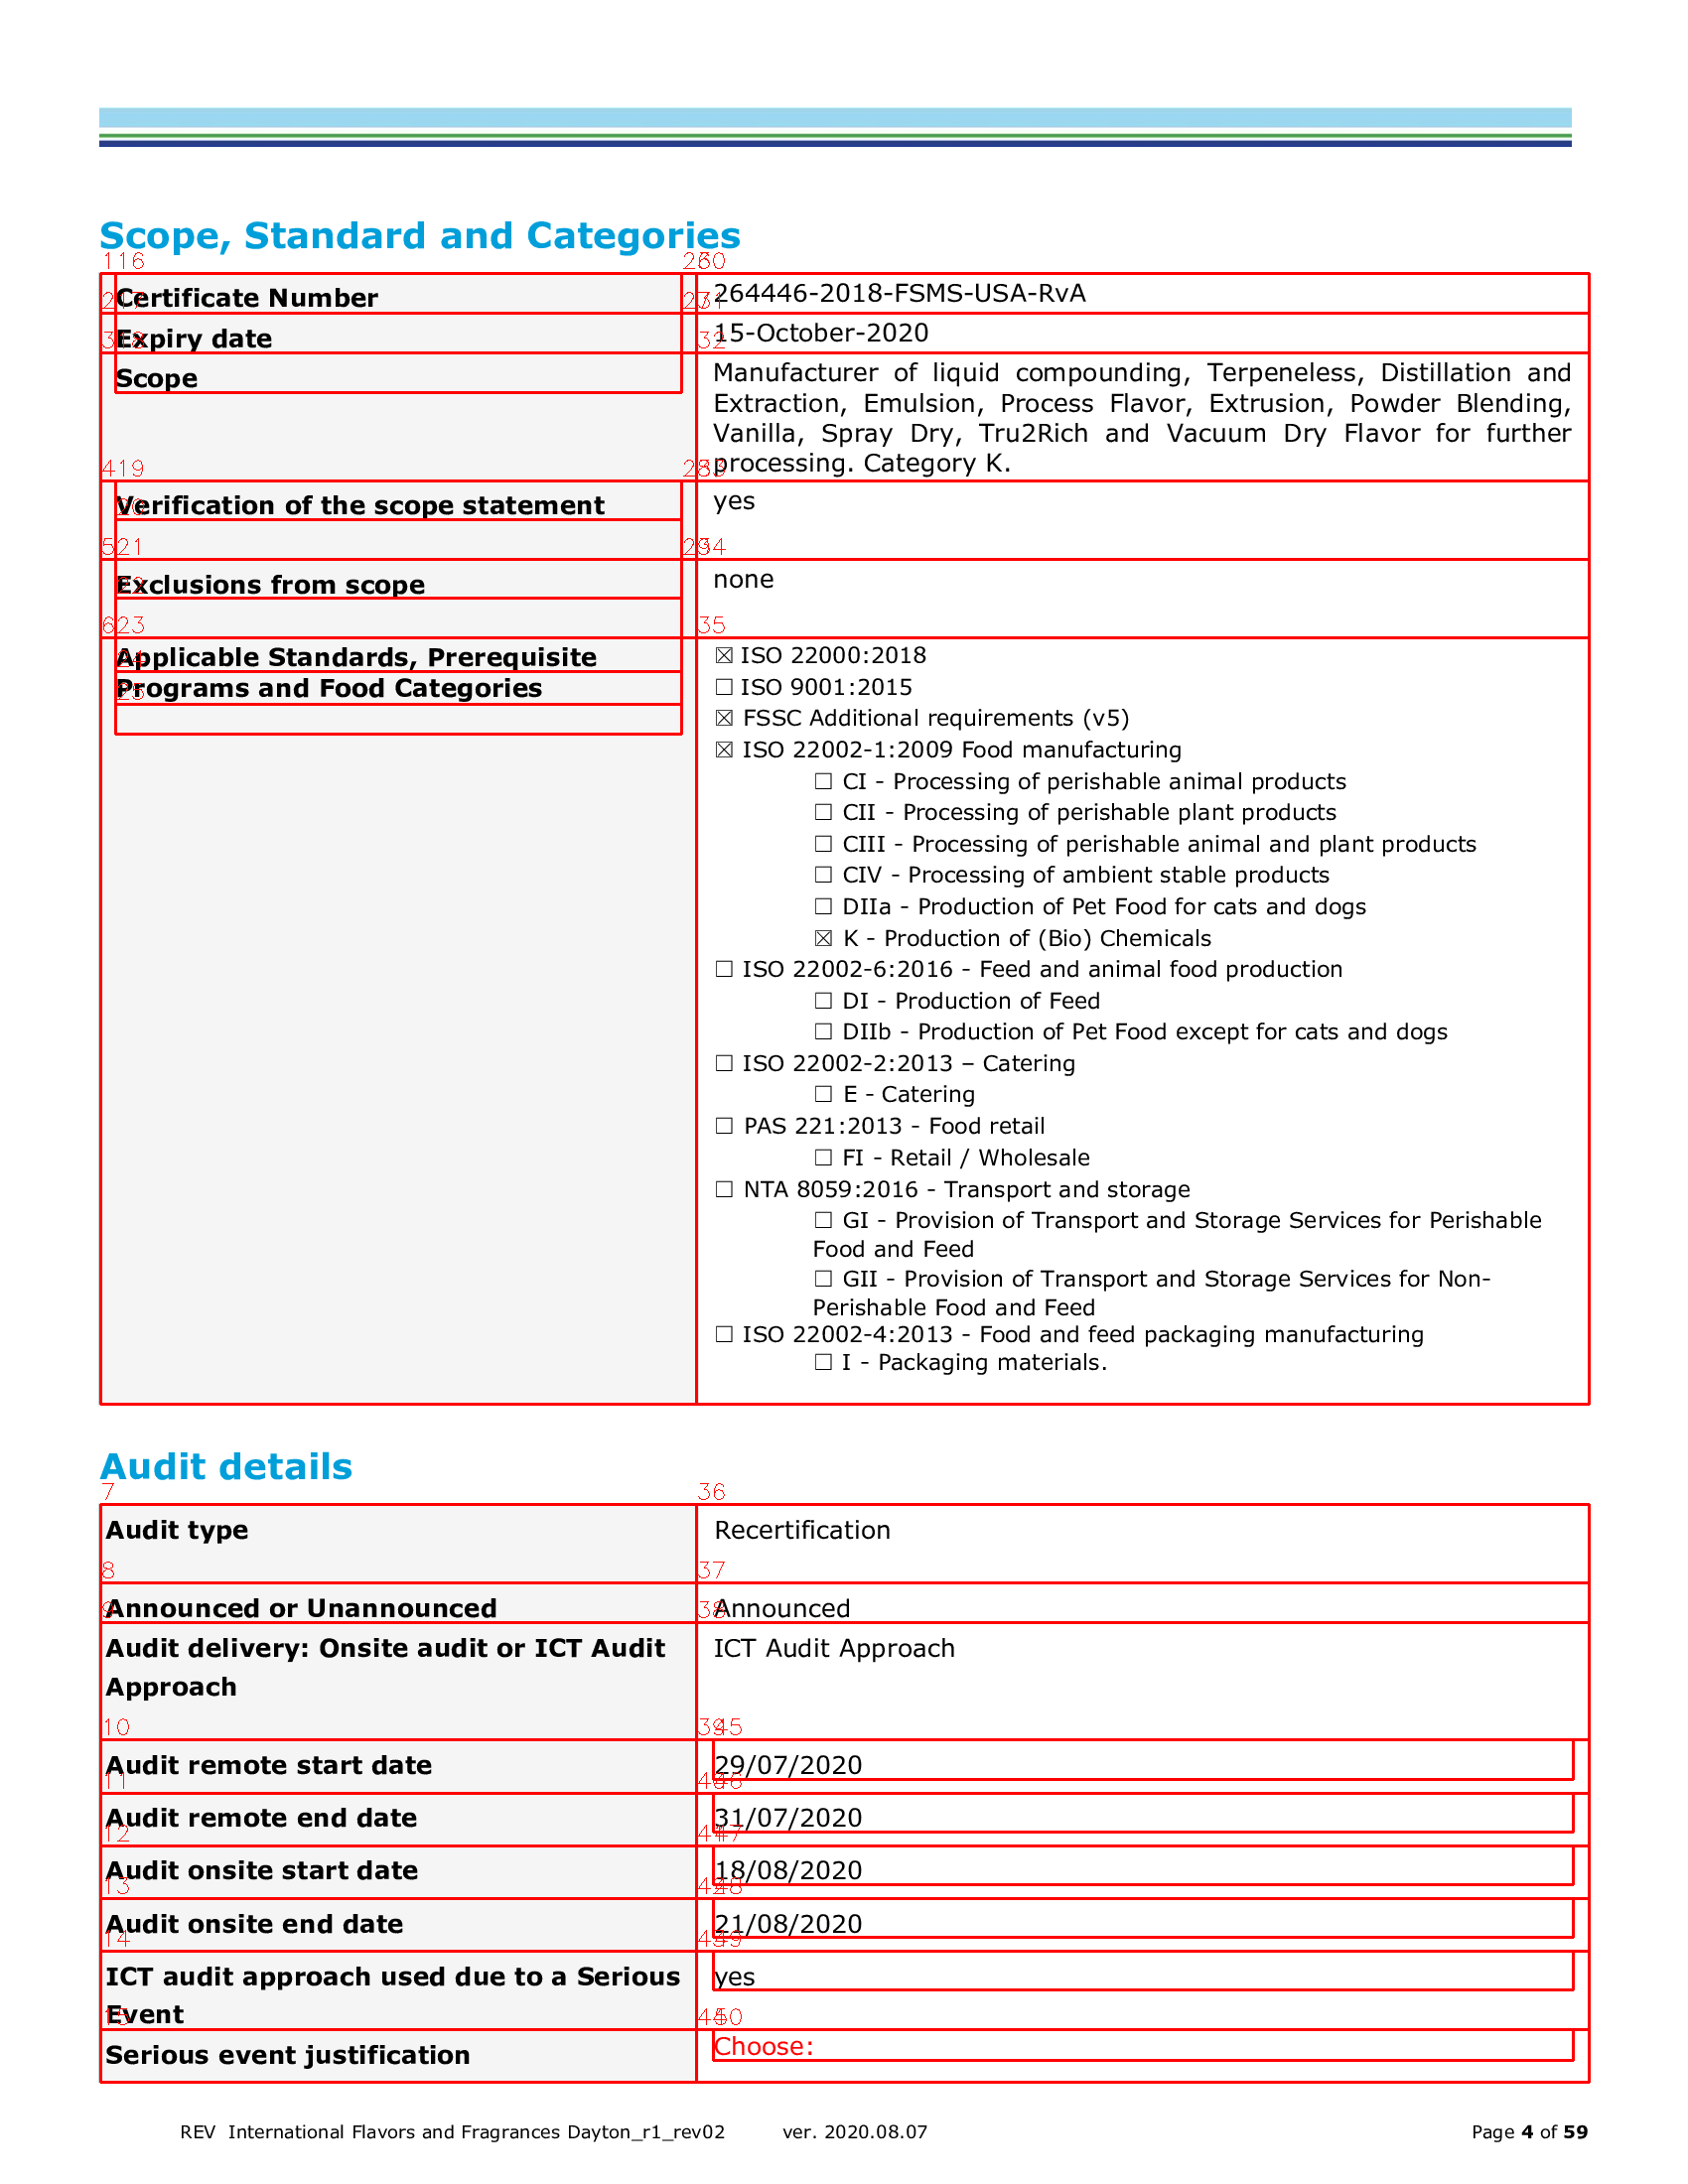

time: 151 ms (started: 2022-12-03 04:49:51 +00:00)


In [132]:
for _id, (x1,y1,x2,y2) in enumerate(np.array(cells).astype(np.int32)):
  cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 2)  
  cv2.putText(img, f'{_id+1}', (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (12,18,255), 1)
cv2_imshow(img)

In [153]:
tables_cells = cells_to_tables(origin_cells)

time: 1.19 ms (started: 2022-12-03 05:52:56 +00:00)


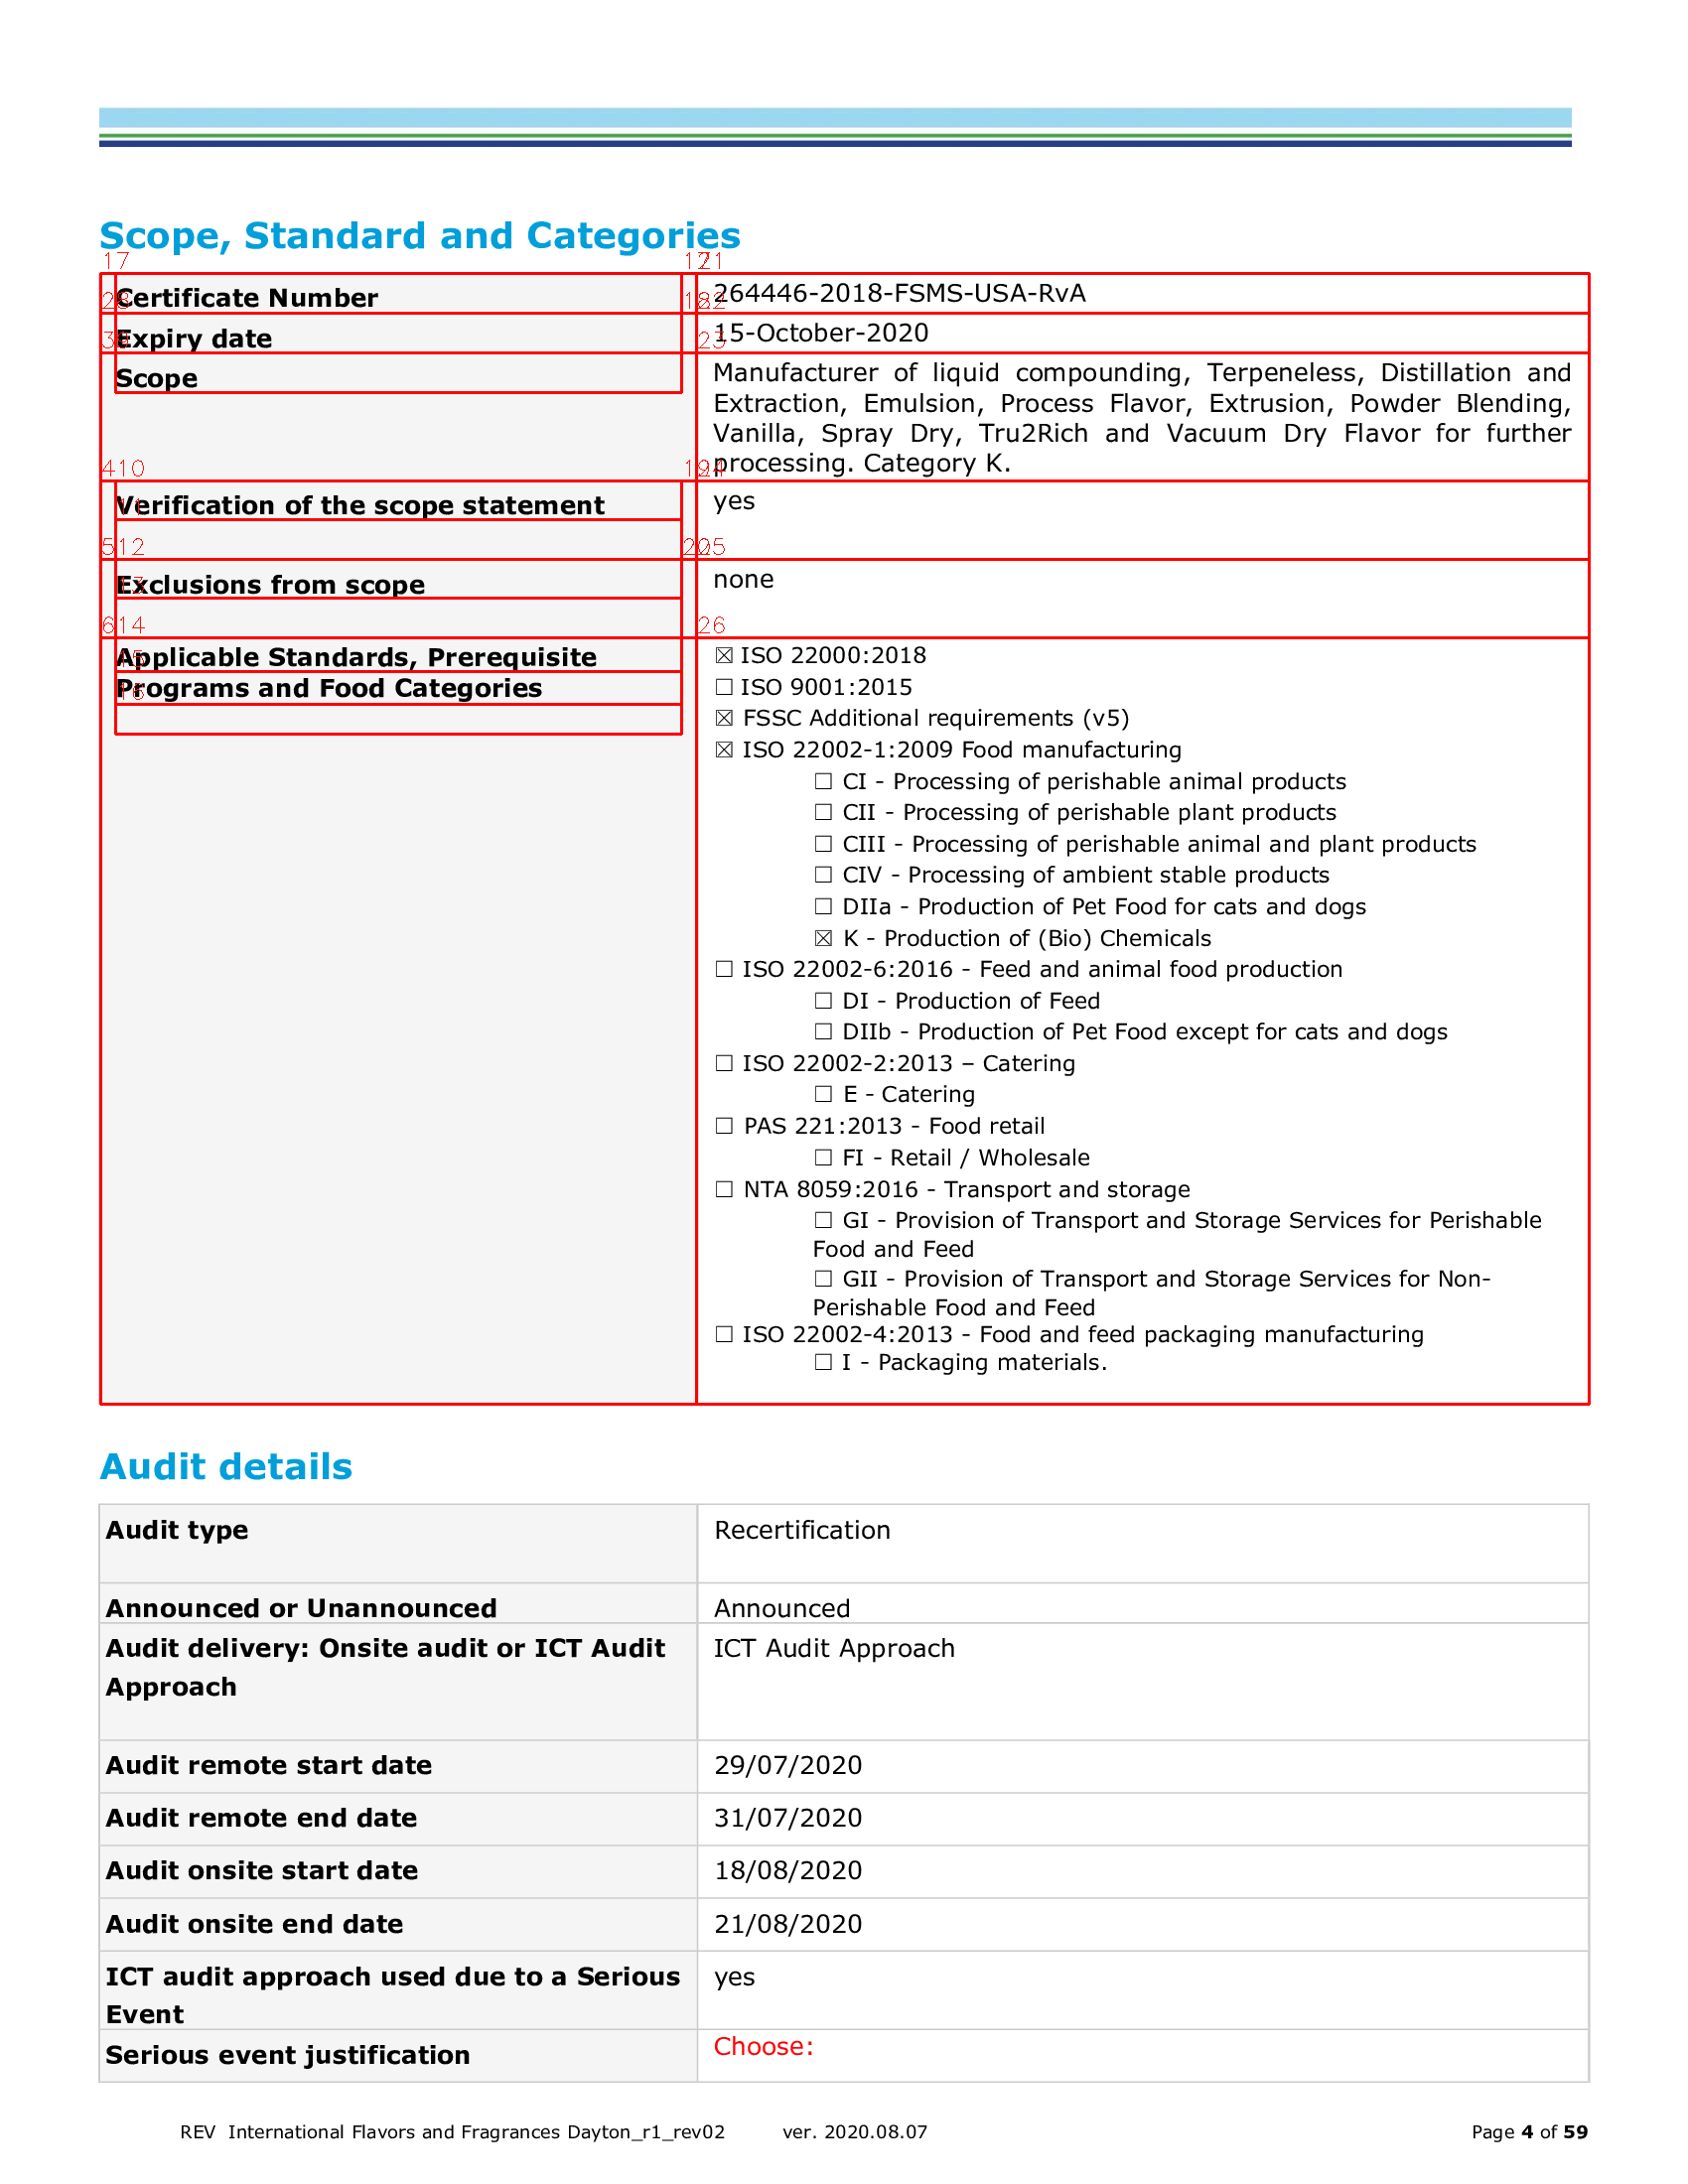

time: 236 ms (started: 2022-12-03 04:37:46 +00:00)


In [124]:
viz_img = img.copy()
table_cells = np.array(tables_cells[0])
for _id, (x1,y1,x2,y2) in enumerate((table_cells*temp_im.scale).astype(np.int32)):
  cv2.rectangle(viz_img, (x1,y1), (x2,y2), (0,0,255), 2)  
  cv2.putText(viz_img, f'{_id+1}', (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (12,18,255), 1)
cv2_imshow(viz_img)

In [154]:
def non_max_suppression_fast(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	# if boxes.dtype.kind == "i":
	# 	boxes = boxes.astype("float")
	# initialize the list of picked indexes	
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(area)
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
	# return boxes[pick].astype("int")
	return boxes[pick]

time: 2.8 ms (started: 2022-12-03 05:53:00 +00:00)


Before: 26
After: 22


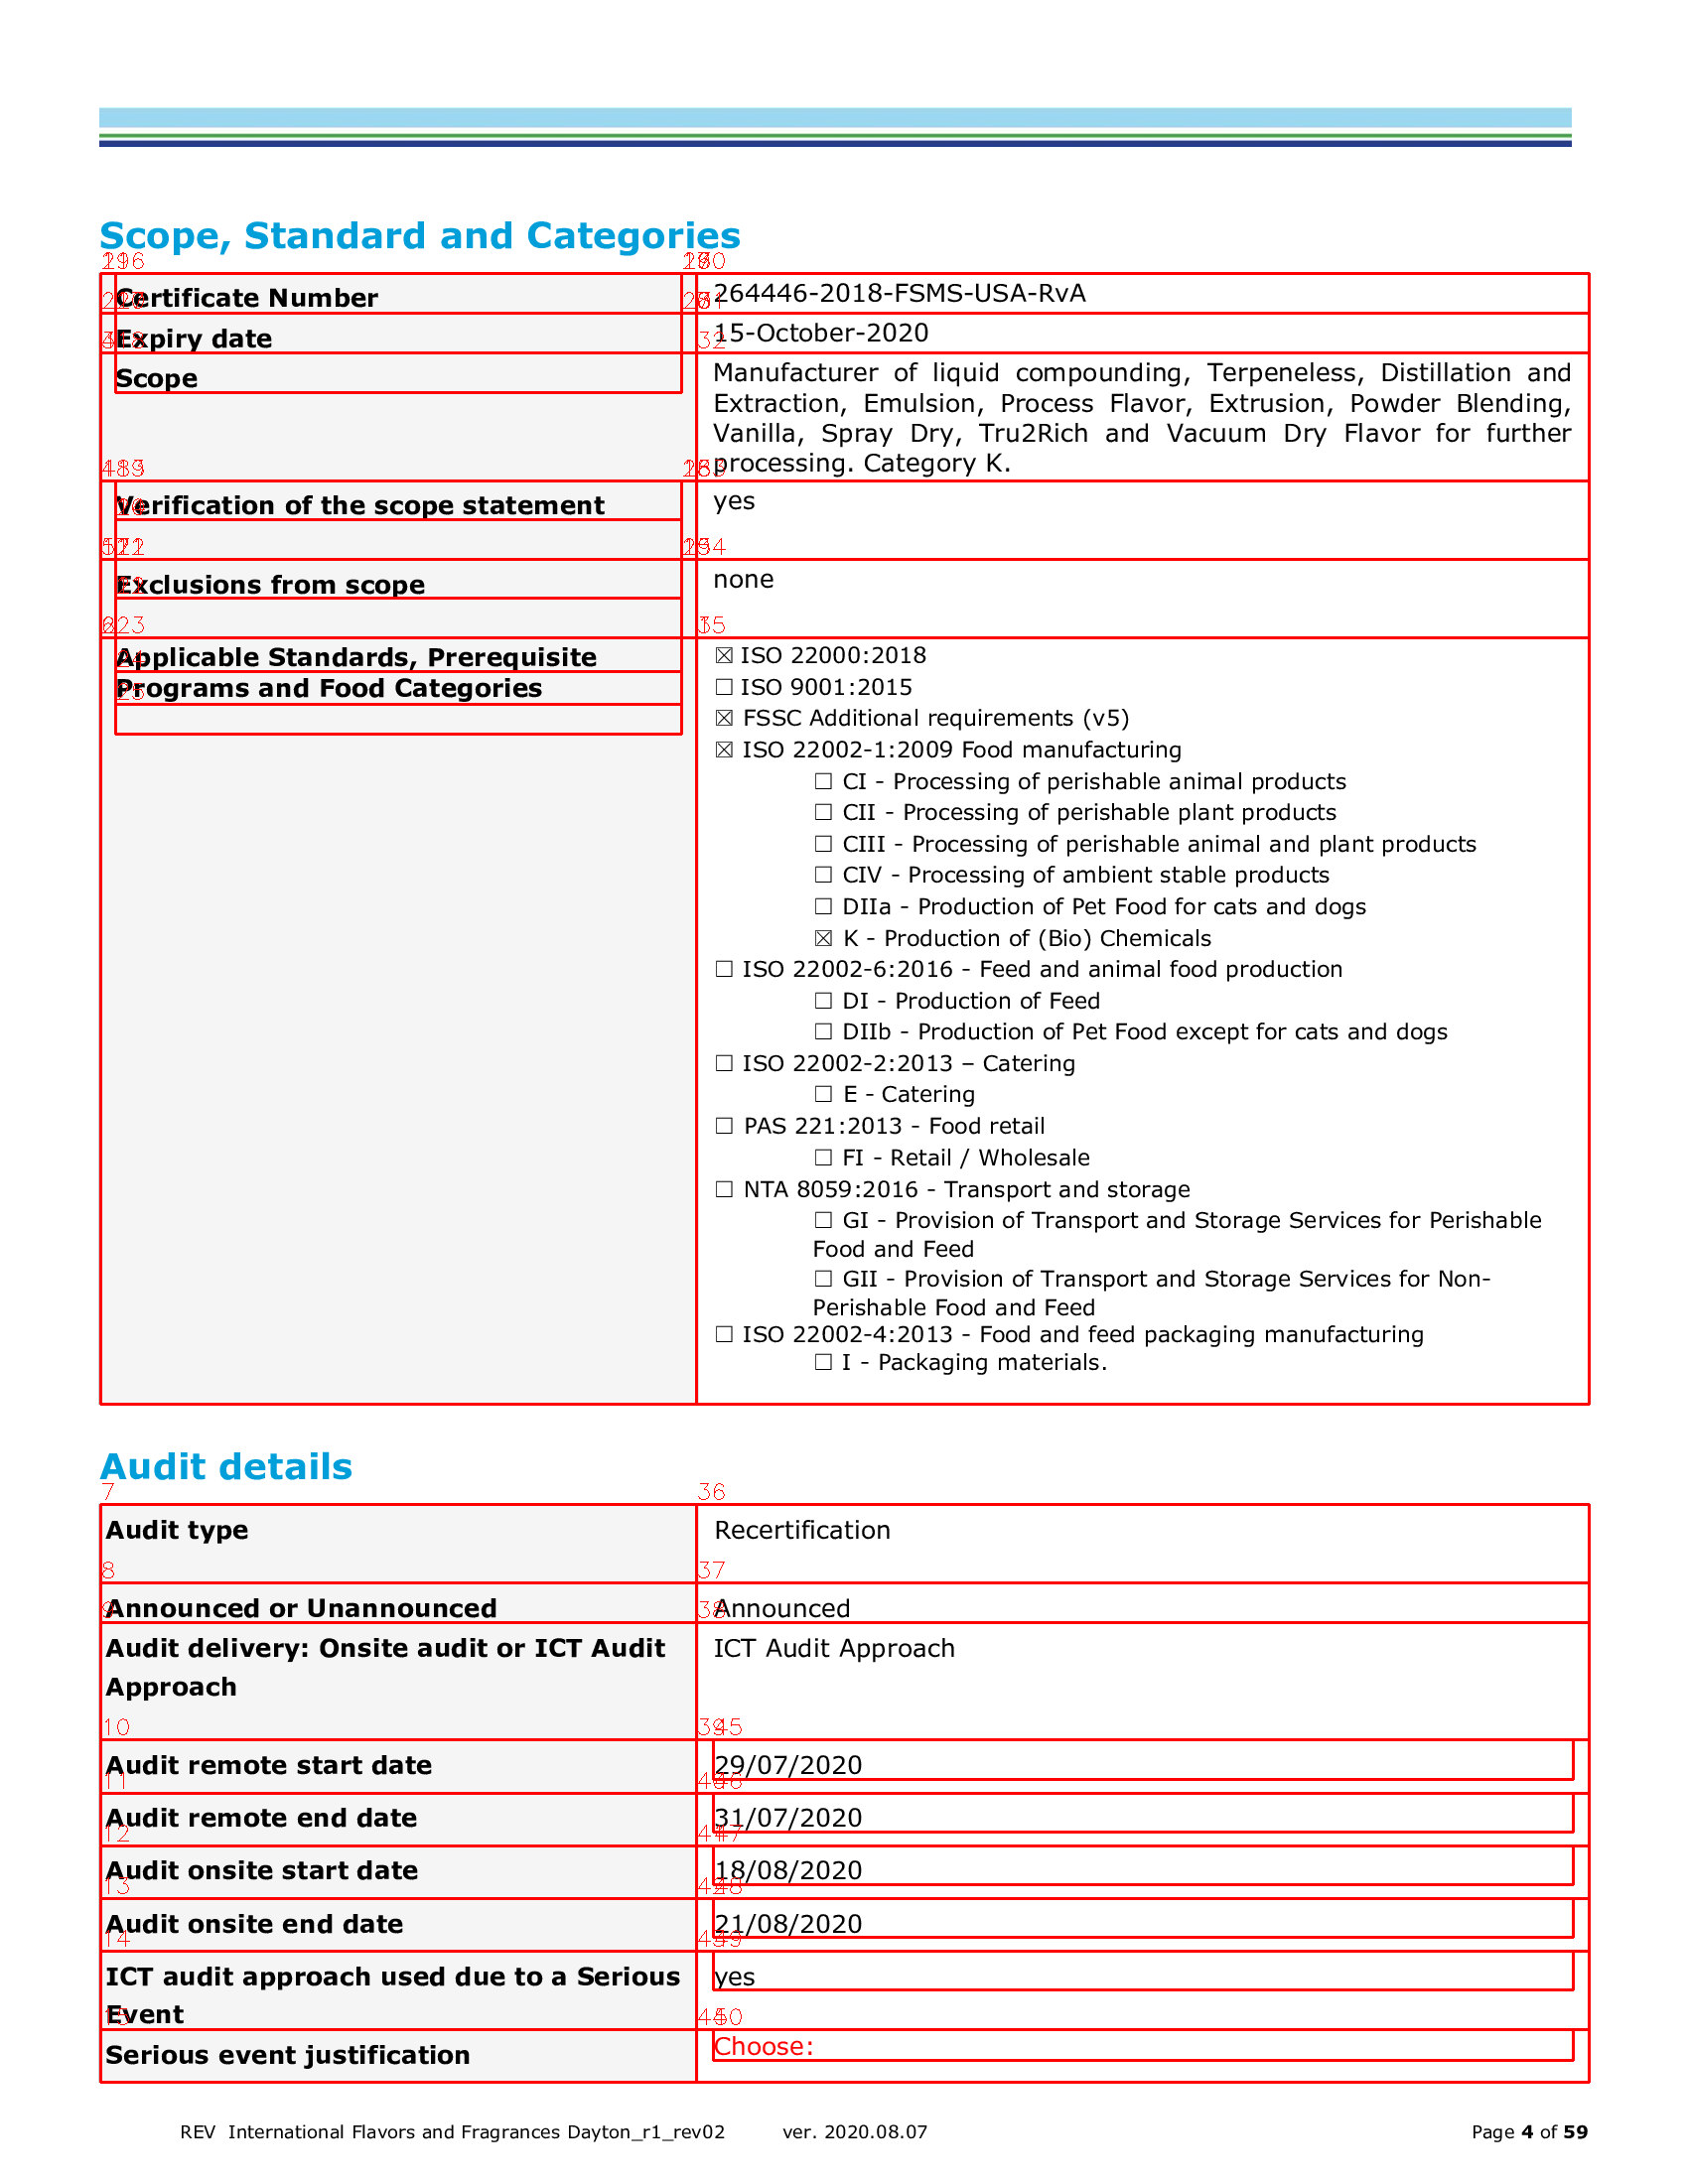

time: 171 ms (started: 2022-12-03 05:53:04 +00:00)


In [155]:
viz_img = img.copy()
table_cells = np.array(tables_cells[0])
print(f'Before: {len(table_cells)}')
table_cells = non_max_suppression_fast(table_cells, overlapThresh=0.2)
print(f'After: {len(table_cells)}')
for _id, (x1,y1,x2,y2) in enumerate((table_cells*temp_im.scale).astype(np.int32)):
  cv2.rectangle(viz_img, (x1,y1), (x2,y2), (0,0,255), 2)  
  cv2.putText(viz_img, f'{_id+1}', (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (12,18,255), 1)
  # if _id > 10: break
cv2_imshow(viz_img)

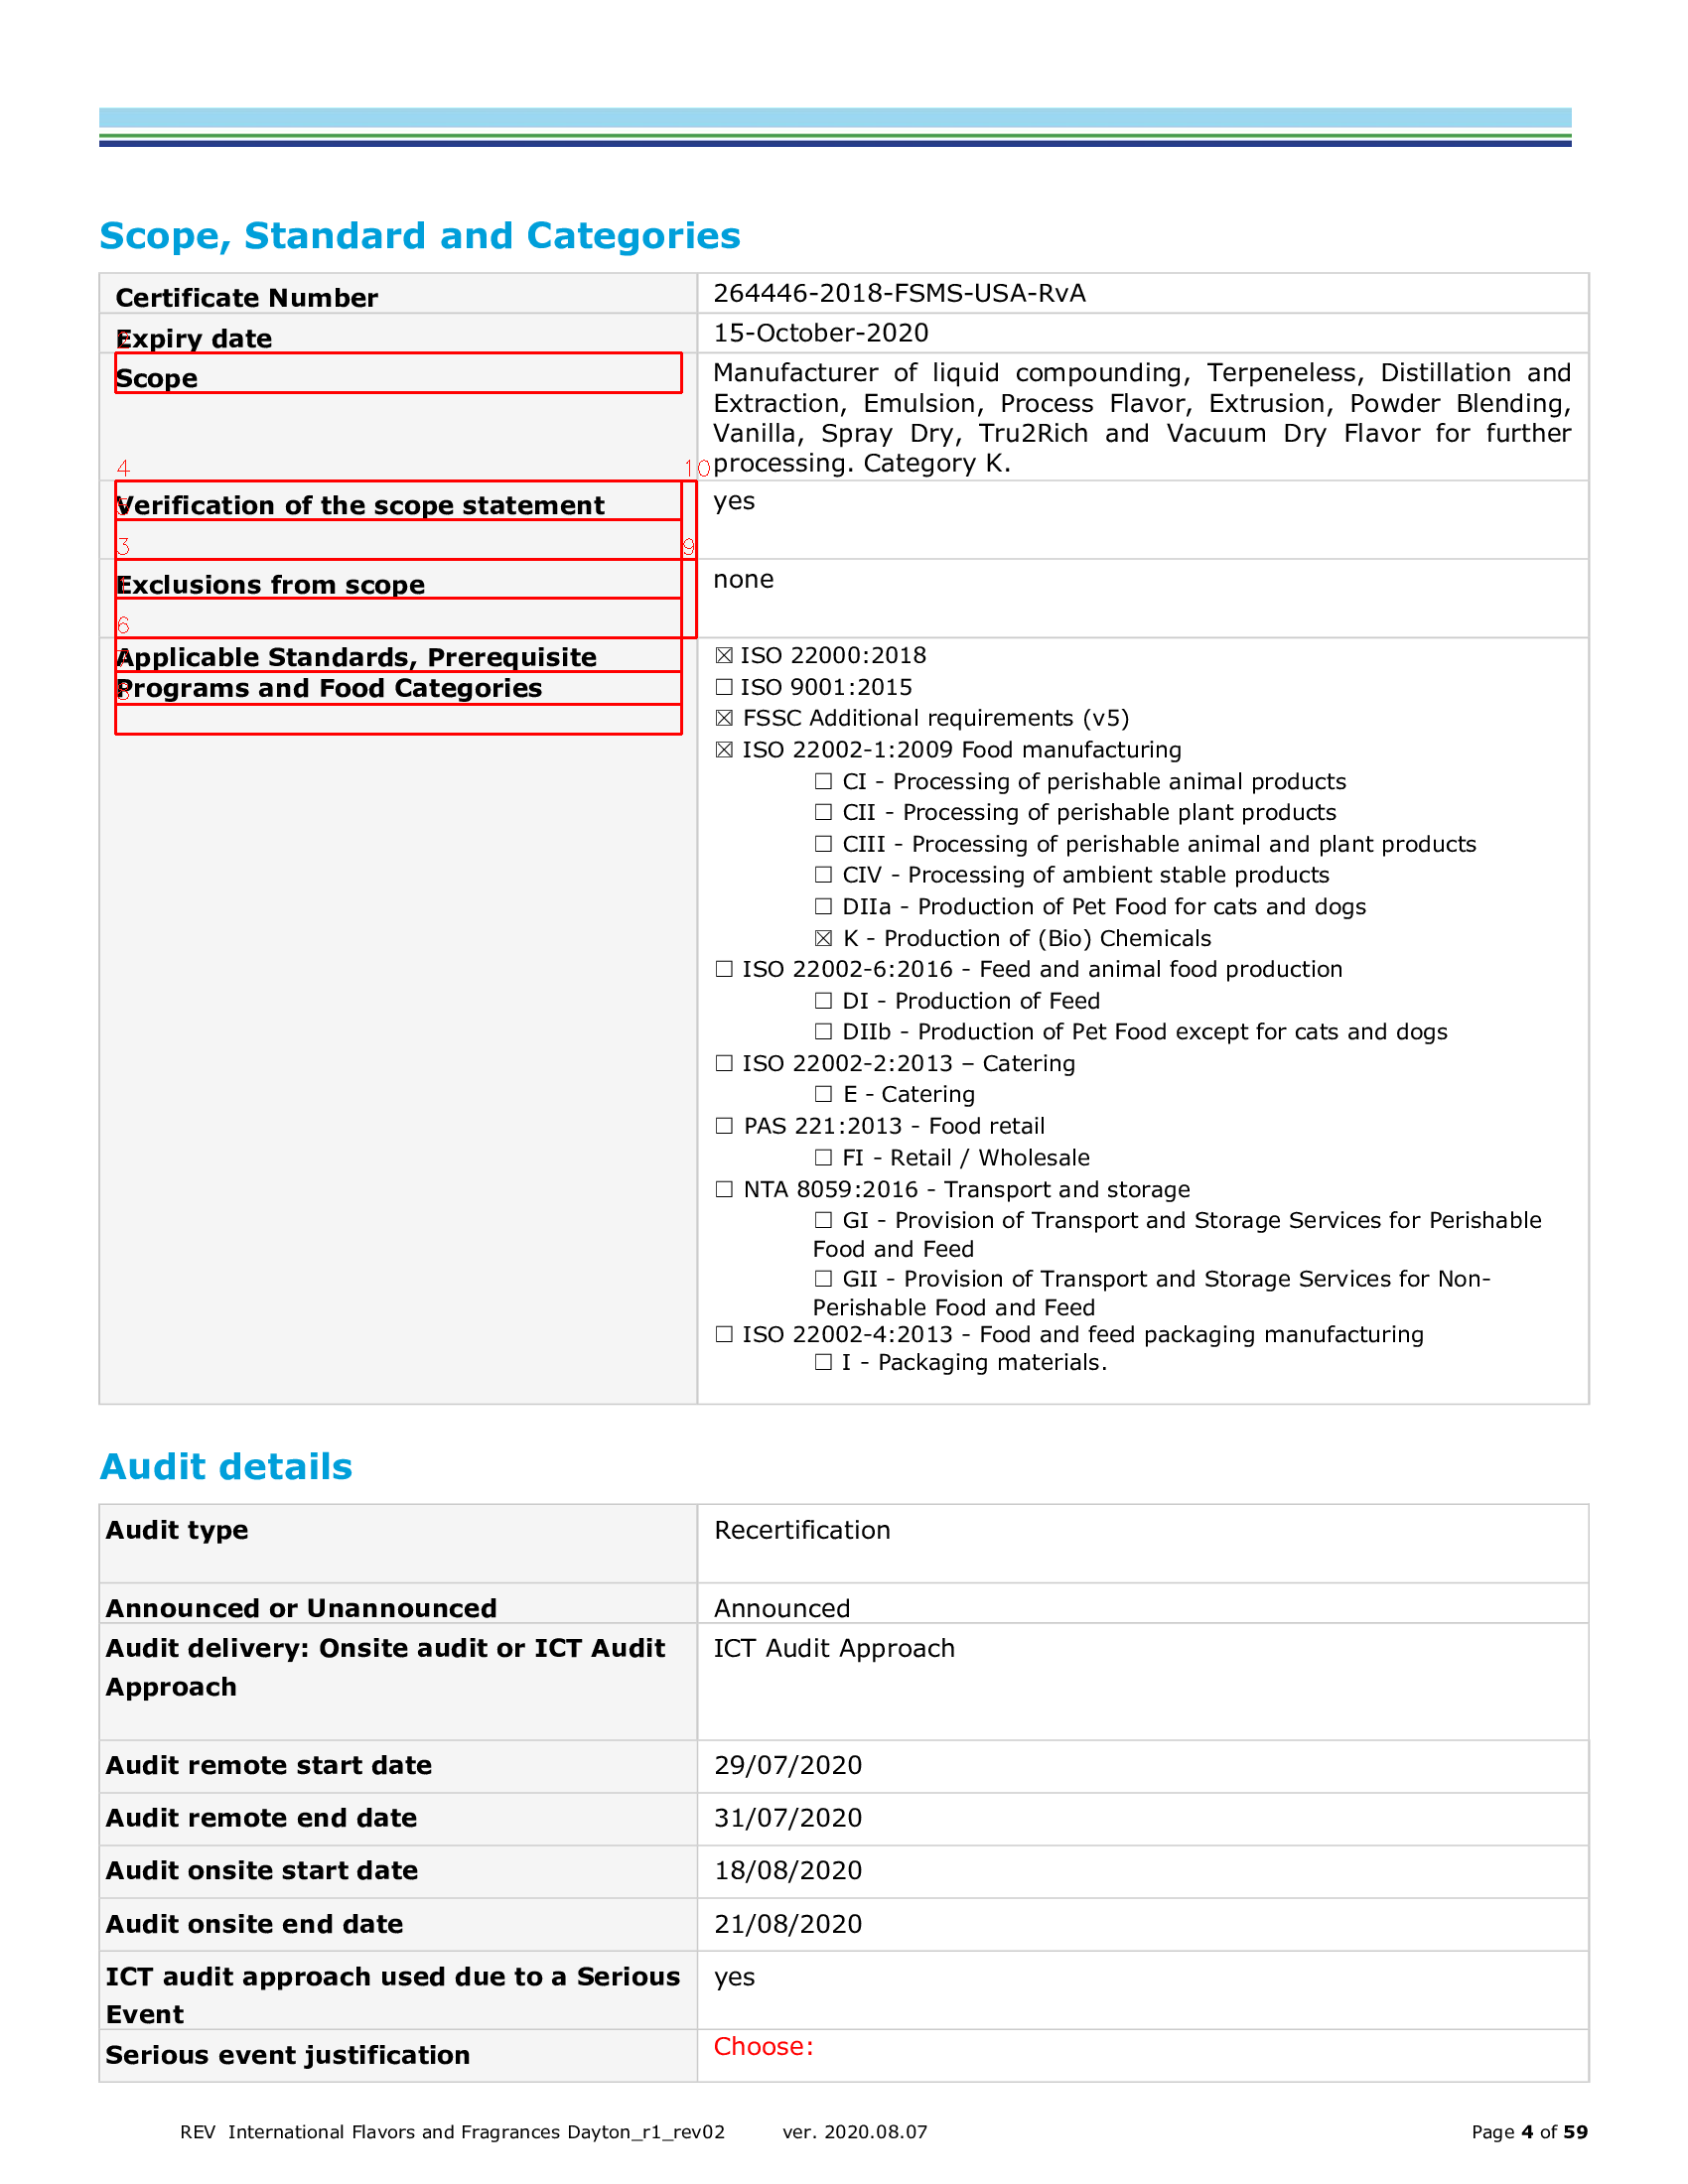

time: 154 ms (started: 2022-12-03 04:39:23 +00:00)


In [130]:
viz_img = img.copy()
table_cells = np.array(tables_cells[0])
areas = (table_cells[:, 2] - table_cells[:, 0]) * (table_cells[:, 3] - table_cells[:, 1])
ids = np.argsort(areas)[::-1]
table_cells = table_cells[(ids)]
# print(f'Before: {len(table_cells)}')
# table_cells = non_max_suppression_fast(table_cells, overlapThresh=0.2)
# print(f'After: {len(table_cells)}')
for _id, (x1,y1,x2,y2) in enumerate((table_cells*temp_im.scale).astype(np.int32)[10:20]):
# _id = 7
# x1,y1,x2,y2 = (table_cells*temp_im.scale).astype(np.int32)[_id]
  cv2.rectangle(viz_img, (x1,y1), (x2,y2), (0,0,255), 2)  
  cv2.putText(viz_img, f'{_id+1}', (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (12,18,255), 1)
  # if _id > 10: break
cv2_imshow(viz_img)

In [131]:
table_cells.shape

(26, 4)

time: 7.84 ms (started: 2022-12-03 04:40:23 +00:00)


In [33]:
tables = [Table(p, cells_group) for cells_group in cells_to_tables(origin_cells)]

time: 888 µs (started: 2022-12-03 00:53:19 +00:00)


In [37]:
tables[0].rows[0].bbox

(36.092571428571496, 99.09200000000025, 575.9236363636379, 124.33263157894743)

time: 4.75 ms (started: 2022-12-03 02:36:04 +00:00)


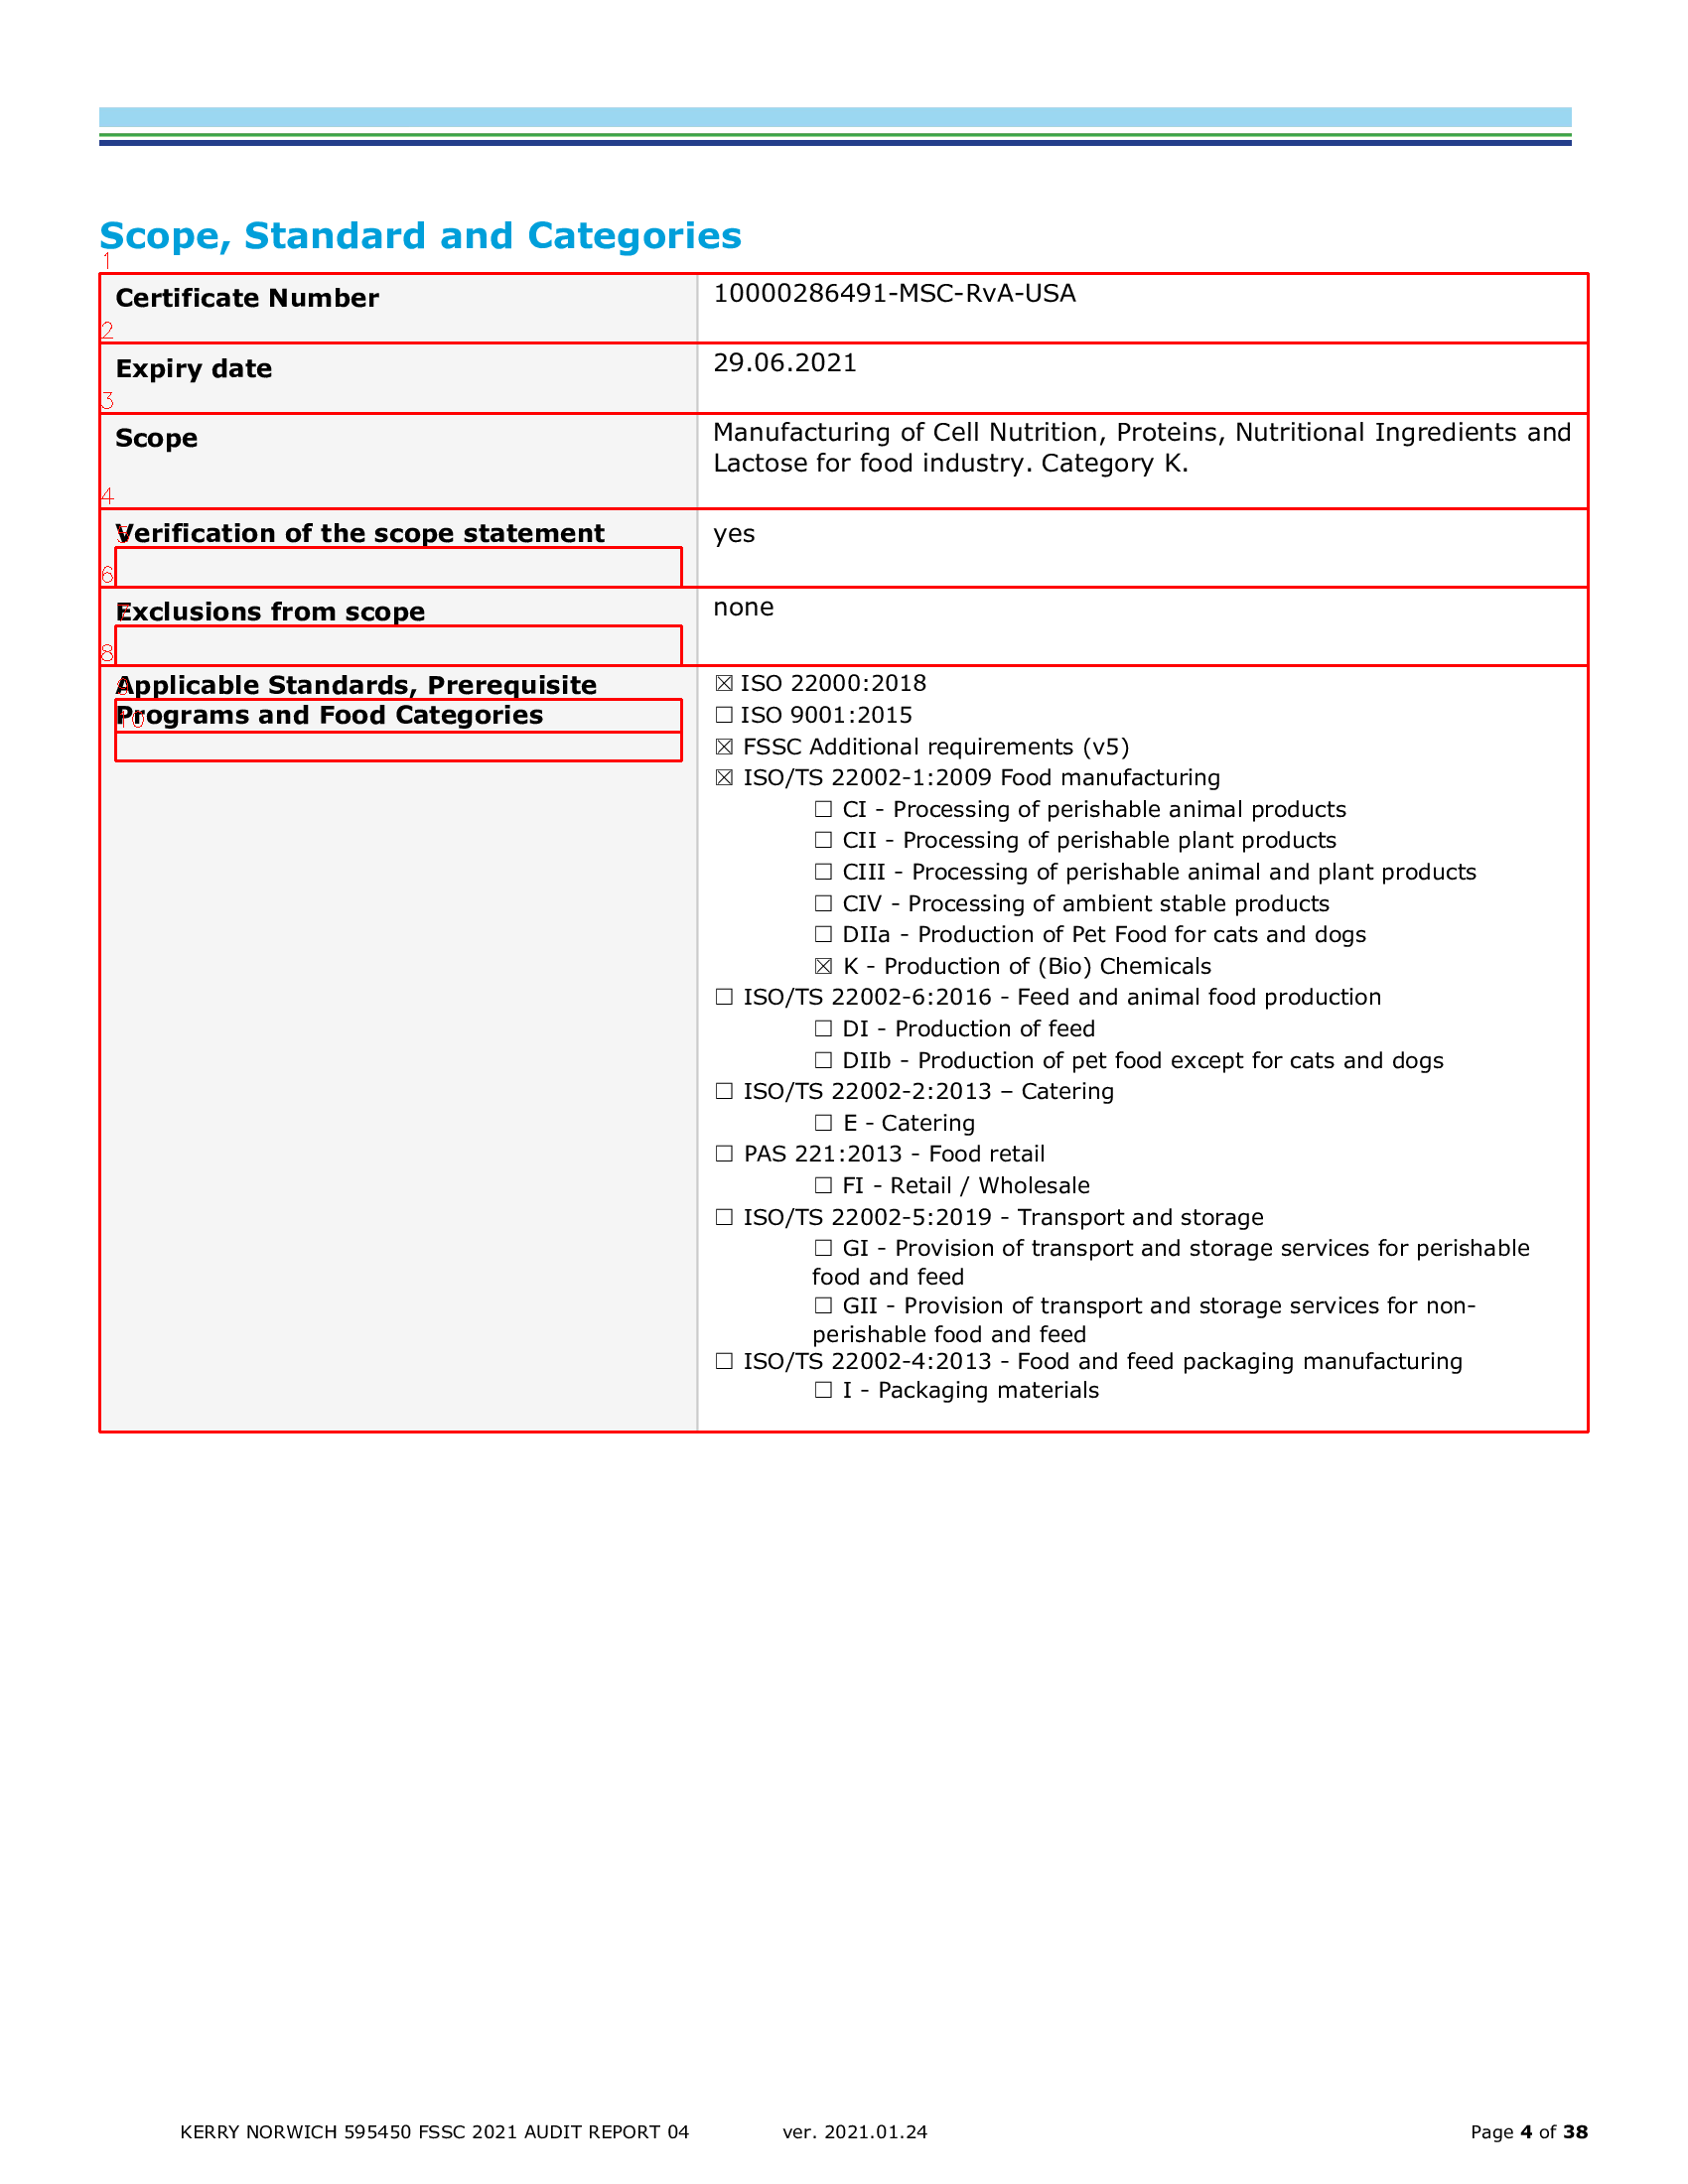

time: 141 ms (started: 2022-12-03 02:41:06 +00:00)


In [57]:
# for _id, (x1,y1,x2,y2) in enumerate(np.array(cells).astype(np.int32)):
for _row_id, _row in enumerate(tables[0].rows):
  x1,y1,x2,y2 = (np.array(_row.bbox)* temp_im.scale).astype(np.int32)
  cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 2)  
  cv2.putText(img, f'{_row_id+1}', (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (12,18,255), 1)
  # break
cv2_imshow(img)

In [ ]:
tables

In [ ]:
for _id, (x1,y1,x2,y2) in enumerate(np.array(cells).astype(np.int32)):
  cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 2)  
  cv2.putText(img, f'{_id+1}', (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (12,18,255), 1)
cv2_imshow(img)

In [ ]:
curves_to_edges(p.curves + p.edges)

In [58]:
print(pd.DataFrame(tables[0].extract()).to_markdown(tablefmt='grid'))

+----+-------------------------------------+-------------------------------------+-----+-------------------------------------------------------------------------+
|    | 0                                   | 1                                   | 2   | 3                                                                       |
+====+=====================================+=====================================+=====+=========================================================================+
|  0 | Certificate Number                  |                                     |     | 10000286491-MSC-RvA-USA                                                 |
+----+-------------------------------------+-------------------------------------+-----+-------------------------------------------------------------------------+
|  1 | Expiry date                         |                                     |     | 29.06.2021                                                              |
+----+----------------

In [ ]:
from collections import Counter
from collections.abc import Iterable

def curves_to_edges(cs):
    edges = []
    for c in cs:
        edges += pdfplumber.utils.rect_to_edges(c)
    return edges
fpath = all_paths[0]
page_debugs = []
all_tables = []
with pdfplumber.open(fpath) as pdf:
  for p in tqdm.tqdm(pdf.pages):
  # p = pdf.pages[4]
    # print(list(map(lambda x: x['non_stroking_color'], p.rects)))
    non_strokings = list(map(lambda x: tuple(x['non_stroking_color']) if isinstance(x['non_stroking_color'], Iterable) else x['non_stroking_color'], p.rects))
    # print(non_strokings)
    c = Counter(non_strokings)
    if len(c) > 0 and len(p.rects) > 30:
      n = 1
      temp = sorted(c.values())[::-1]
      for i in temp[1:]:
        if temp[0] / i < 2 and i > 10: n += 1
      mode_value = list(map(lambda x: x[0], c.most_common(n)))
      # print(len(c), len(p.rects))
      # print(c)
      # print(mode_value)

      filter_fn = keep_visible_lines(mode_value)

      # print(len(p.rects))

    ts = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "explicit",
        "explicit_vertical_lines": curves_to_edges(p.curves + p.edges),
        "explicit_horizontal_lines": curves_to_edges(p.curves + p.edges),
    }

    tables = p.find_tables(table_settings=ts)
    all_tables += tables

    # for table in tables:
    #     print()
    #     for row in table:
    #         print(row)
    # im = p.to_image(resolution=200)
    # debugged = im.debug_tablefinder(ts)
    # page_debugs += [debugged]

all_tables = list(map(lambda x: pd.DataFrame(x.extract()), all_tables))

  0%|          | 0/48 [00:00<?, ?it/s]


NameError: ignored

time: 1.25 s (started: 2022-12-01 13:53:38 +00:00)


In [ ]:
print(all_tables[2].to_markdown(tablefmt='grid'))

+----+----------------------------------------------------------------------------------------------------------------------------------------+
|    | 0                                                                                                                                      |
+====+========================================================================================================================================+
|  0 | Audit is based on sampling                                                                                                             |
+----+----------------------------------------------------------------------------------------------------------------------------------------+
|  1 | The audit itself and this report represent only the extent of assessment that took place within the time available; as such they are a |
|    | sample.                                                                                                                          

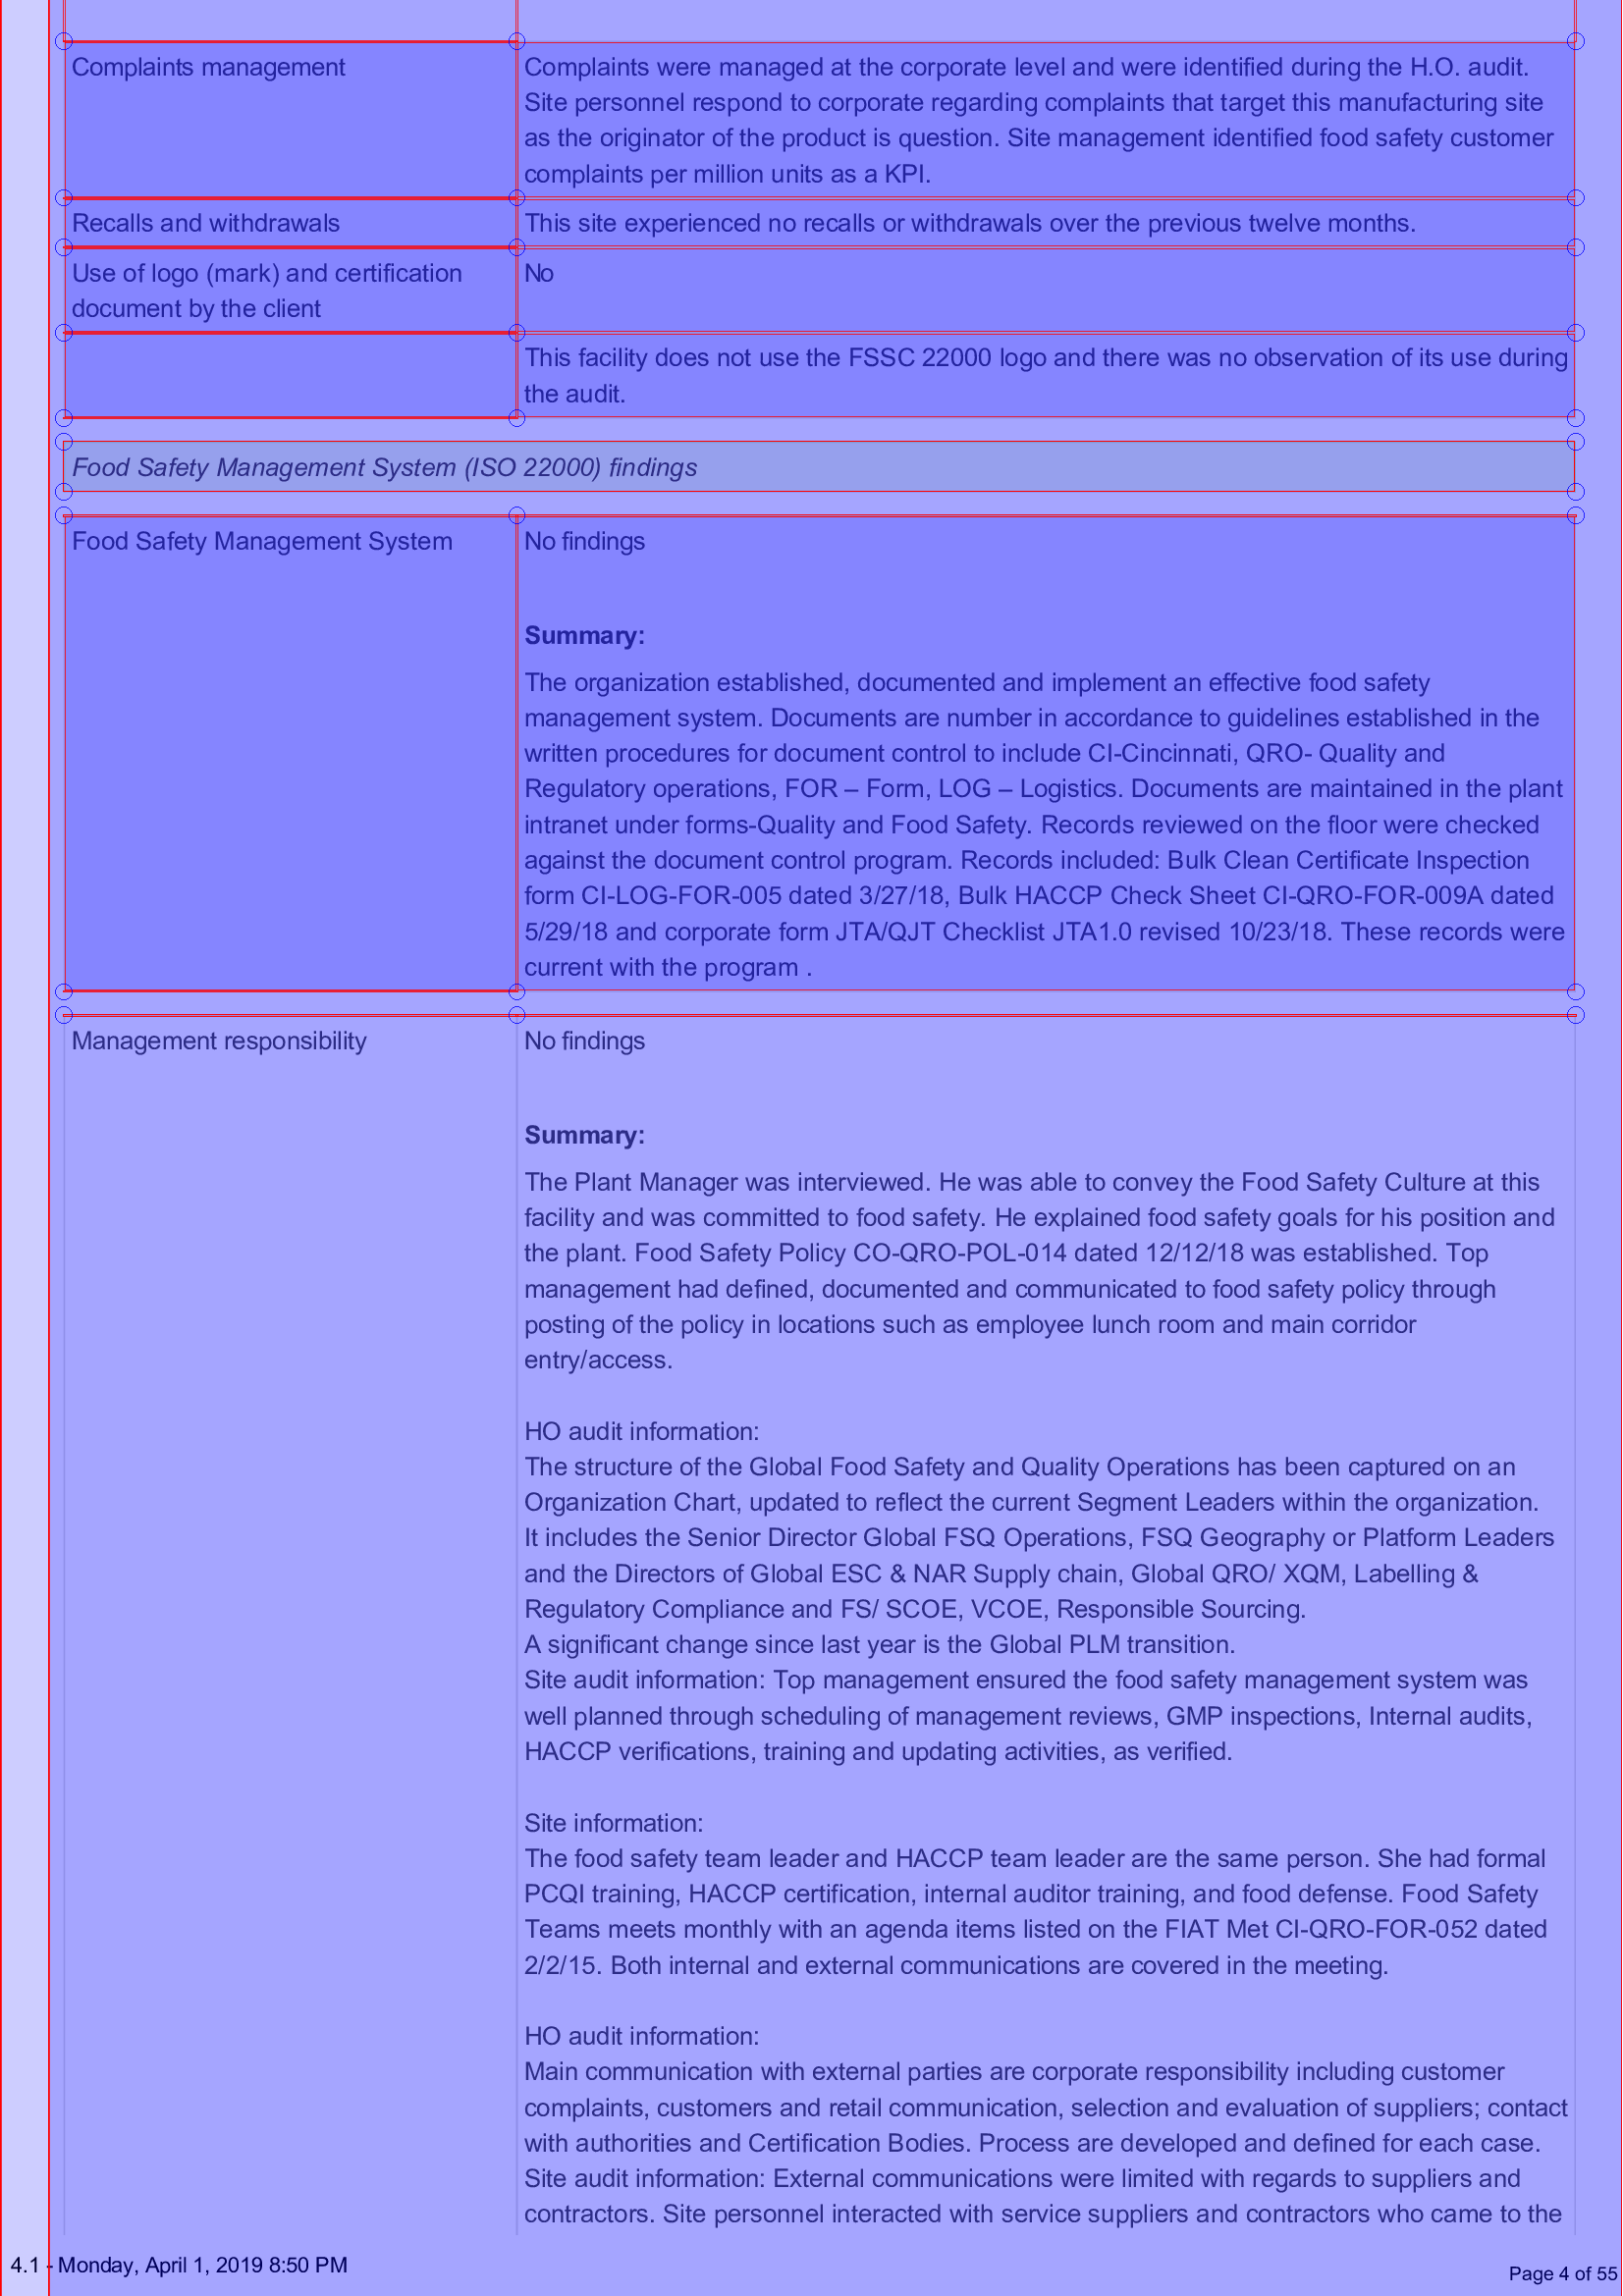

time: 341 ms (started: 2022-12-01 10:44:23 +00:00)


In [ ]:
page_debugs[3]

In [ ]:
print(pd.DataFrame(tables[0].extract()).to_markdown(tablefmt='grid'))

In [ ]:
len(tables)

7

time: 12.6 ms (started: 2022-12-01 06:04:02 +00:00)


In [ ]:
pdf = pdfplumber.open(all_paths[30])
p = pdf.pages[2]
im = p.to_image(resolution=150)
im.draw_lines(p.curves+p.edges)
# im.draw_lines(p.edges)
# im.draw_lines(p.curves)
im.save("image.png", format="PNG")

time: 1.87 s (started: 2022-12-01 10:46:28 +00:00)


In [ ]:
help(p)

In [ ]:
len(tables)

0

time: 12.2 ms (started: 2022-12-01 05:07:23 +00:00)


In [ ]:
tables = get_tables_from_file(filenames[0])
# tables = all_datas[12]
company_name, cpn_score = get_key_value(tables, company_name_keys, threshold=0.8) 
address, addr_score = get_key_value(tables, address_keys, threshold=0.8)
num_critical, critical_score = get_key_value(tables, num_critical_keys, threshold=0.8)
num_major, major_score = get_key_value(tables, num_major_keys, threshold=0.8)
num_minor, minor_score = get_key_value(tables, num_minor_keys, threshold=0.8)

audit_type, audit_type_score = get_key_value(tables, audit_type_keys, threshold=0.8)
if not audit_type:
  audit_type, audit_type_score = get_key_value(tables, prev_audit_type_keys, threshold=0.8)

audit_company, audit_company_score = get_key_value(tables, audit_company_keys, threshold=0.8)

# audit_recommendation = get_audit_recommendation(tables, rcm_keys, threshold=0.8)


result = {
    'Company name': [company_name],
    'Address': [address],
    'Audit company name': [audit_company],
    'Audit type': [audit_type],
    'Number critical': [num_critical],
    'Number major': [num_major],
    'Number minor': [num_minor],
    # 'Recommendation': [audit_recommendation.to_string() if audit_recommendation is not None else None]
}

result = pd.DataFrame(index=list(result.keys()), data=list(result.values()), columns=['Result'])
print(result.to_markdown(tablefmt='grid'))

In [ ]:
from dateutil import parser

time: 14.1 ms (started: 2022-12-01 16:35:13 +00:00)


In [ ]:
parser.parse('August 20, 2021', fuzzy=True).strftime("%m/%d/%Y")

'08/20/2021'

time: 9.01 ms (started: 2022-12-01 16:35:44 +00:00)
